# B06 Health Insurance Affordability&Coverage Fairness 2015-2016 TEXAS Marketplace


Team B06: XinCheng Ding, Zixiao Jiao, Hanchao Tang, Tanmay Yenge, Linh Le, Yunhsuan Ku

# Problem Definition:

This project analyzes the affordability and fairness of health insurance plans in Texas during 2015–2016, using cleaned marketplace rate and benefit data.
Specifically, it aims to:
- Evaluate how average health insurance premiums varied across different plan types and price levels in the Texas marketplace during 2015–2016.
- Examine how insurer competition and plan diversity influenced premium pricing and consumer choices.
- Analyze the relationship between premium levels and cost-sharing features (e.g., copays, coinsurance) to understand how financial risk is distributed between insurers and consumers.
- Identify whether higher-priced plans provide proportionally better coverage and lower out-of-pocket costs.
- Provide insights into how market design and policy conditions in Texas affected consumer affordability and fairness during the early years of ACA implementation.

#Executive Summary

This report analyzes health insurance affordability and pricing fairness in the U.S. Marketplace (2015–2016), with Texas as a focal state, using rate and benefit cost-sharing data. We examine premium levels, age-based pricing, insurer competition, and plan cost-sharing to understand how consumers experience financial protection across markets. We find that Texas has moderate premium levels but one of the steepest age-rating curves nationally, creating elevated affordability risk for older adults. Despite having high issuer participation, Texas premiums remain relatively stable year over year. At the plan level, premium is a weak signal of generosity: higher premiums do not reliably correspond to lower copays or coinsurance. Using K-means clustering on Covered Texas plans, we identify four plan archetypes and again observe that plans with nearly identical average premiums can exhibit markedly different point-of-service cost burdens. Overall, the results underscore the need for clearer plan signaling and stronger benefit standardization to improve consumer value and transparency.

# Motivation:
During 2015–2016, Texas experienced significant shifts in its health insurance marketplace as the Affordable Care Act (ACA) expanded coverage options. However, many consumers still faced rising premiums and confusion over plan structures, particularly regarding tobacco surcharges and benefit coverage differences. This project aims to examine whether health insurance in Texas during this period imposed unequal financial burdens on consumers, and to identify the factors—such as insurer competition, tobacco status, and plan generosity—that most strongly influenced affordability and fairness.

# Data Source
- Primary Dataset – Rate PUF (Centers for Medicare & Medicaid Services / U.S. Department of Health & Human Services Health Insurance Exchange Public-Use Files: Plan-level data on rates including subscriber age and geographic location. Link: https://www.kaggle.com/datasets/hhs/health-insurance-marketplace/data?select=Rate.csv   
- Secondary Dataset – Benefits and Cost Sharing PUF: Plan-level data on essential health benefits, coverage limits and cost sharing. Link: https://www.kaggle.com/datasets/hhs/health-insurance-marketplace/data?select=BenefitsCostSharing.csv
- Tertiary Dataset – State-level Economic Indicators: Median household income, healthcare spending per capita, poverty rate by state (to be downloaded from U.S. Census or BEA). Link: https://www.census.gov/topics/income-poverty/income/data/datasets.html

### Data Dictionary

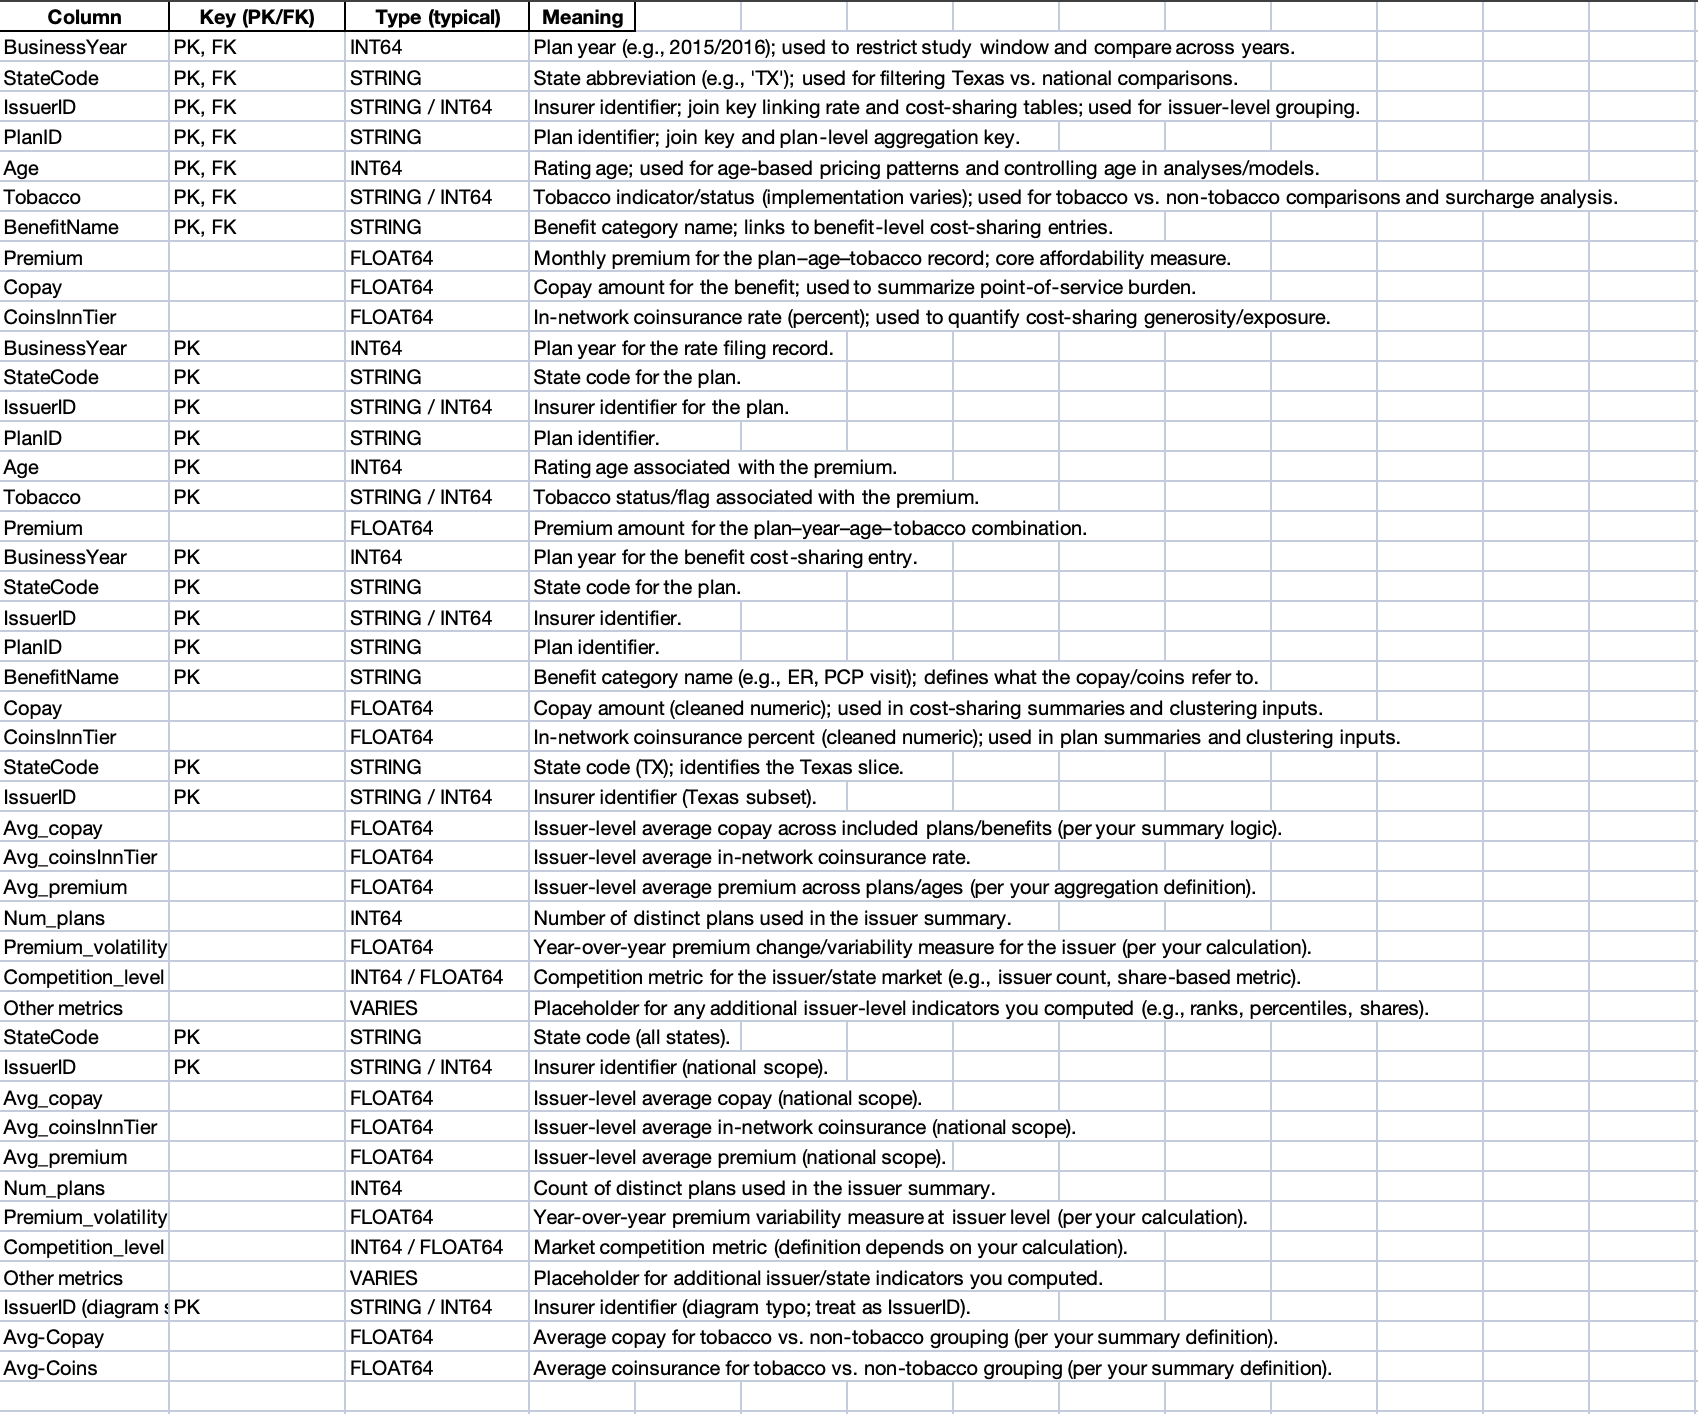

### Entity Relationship Diagram

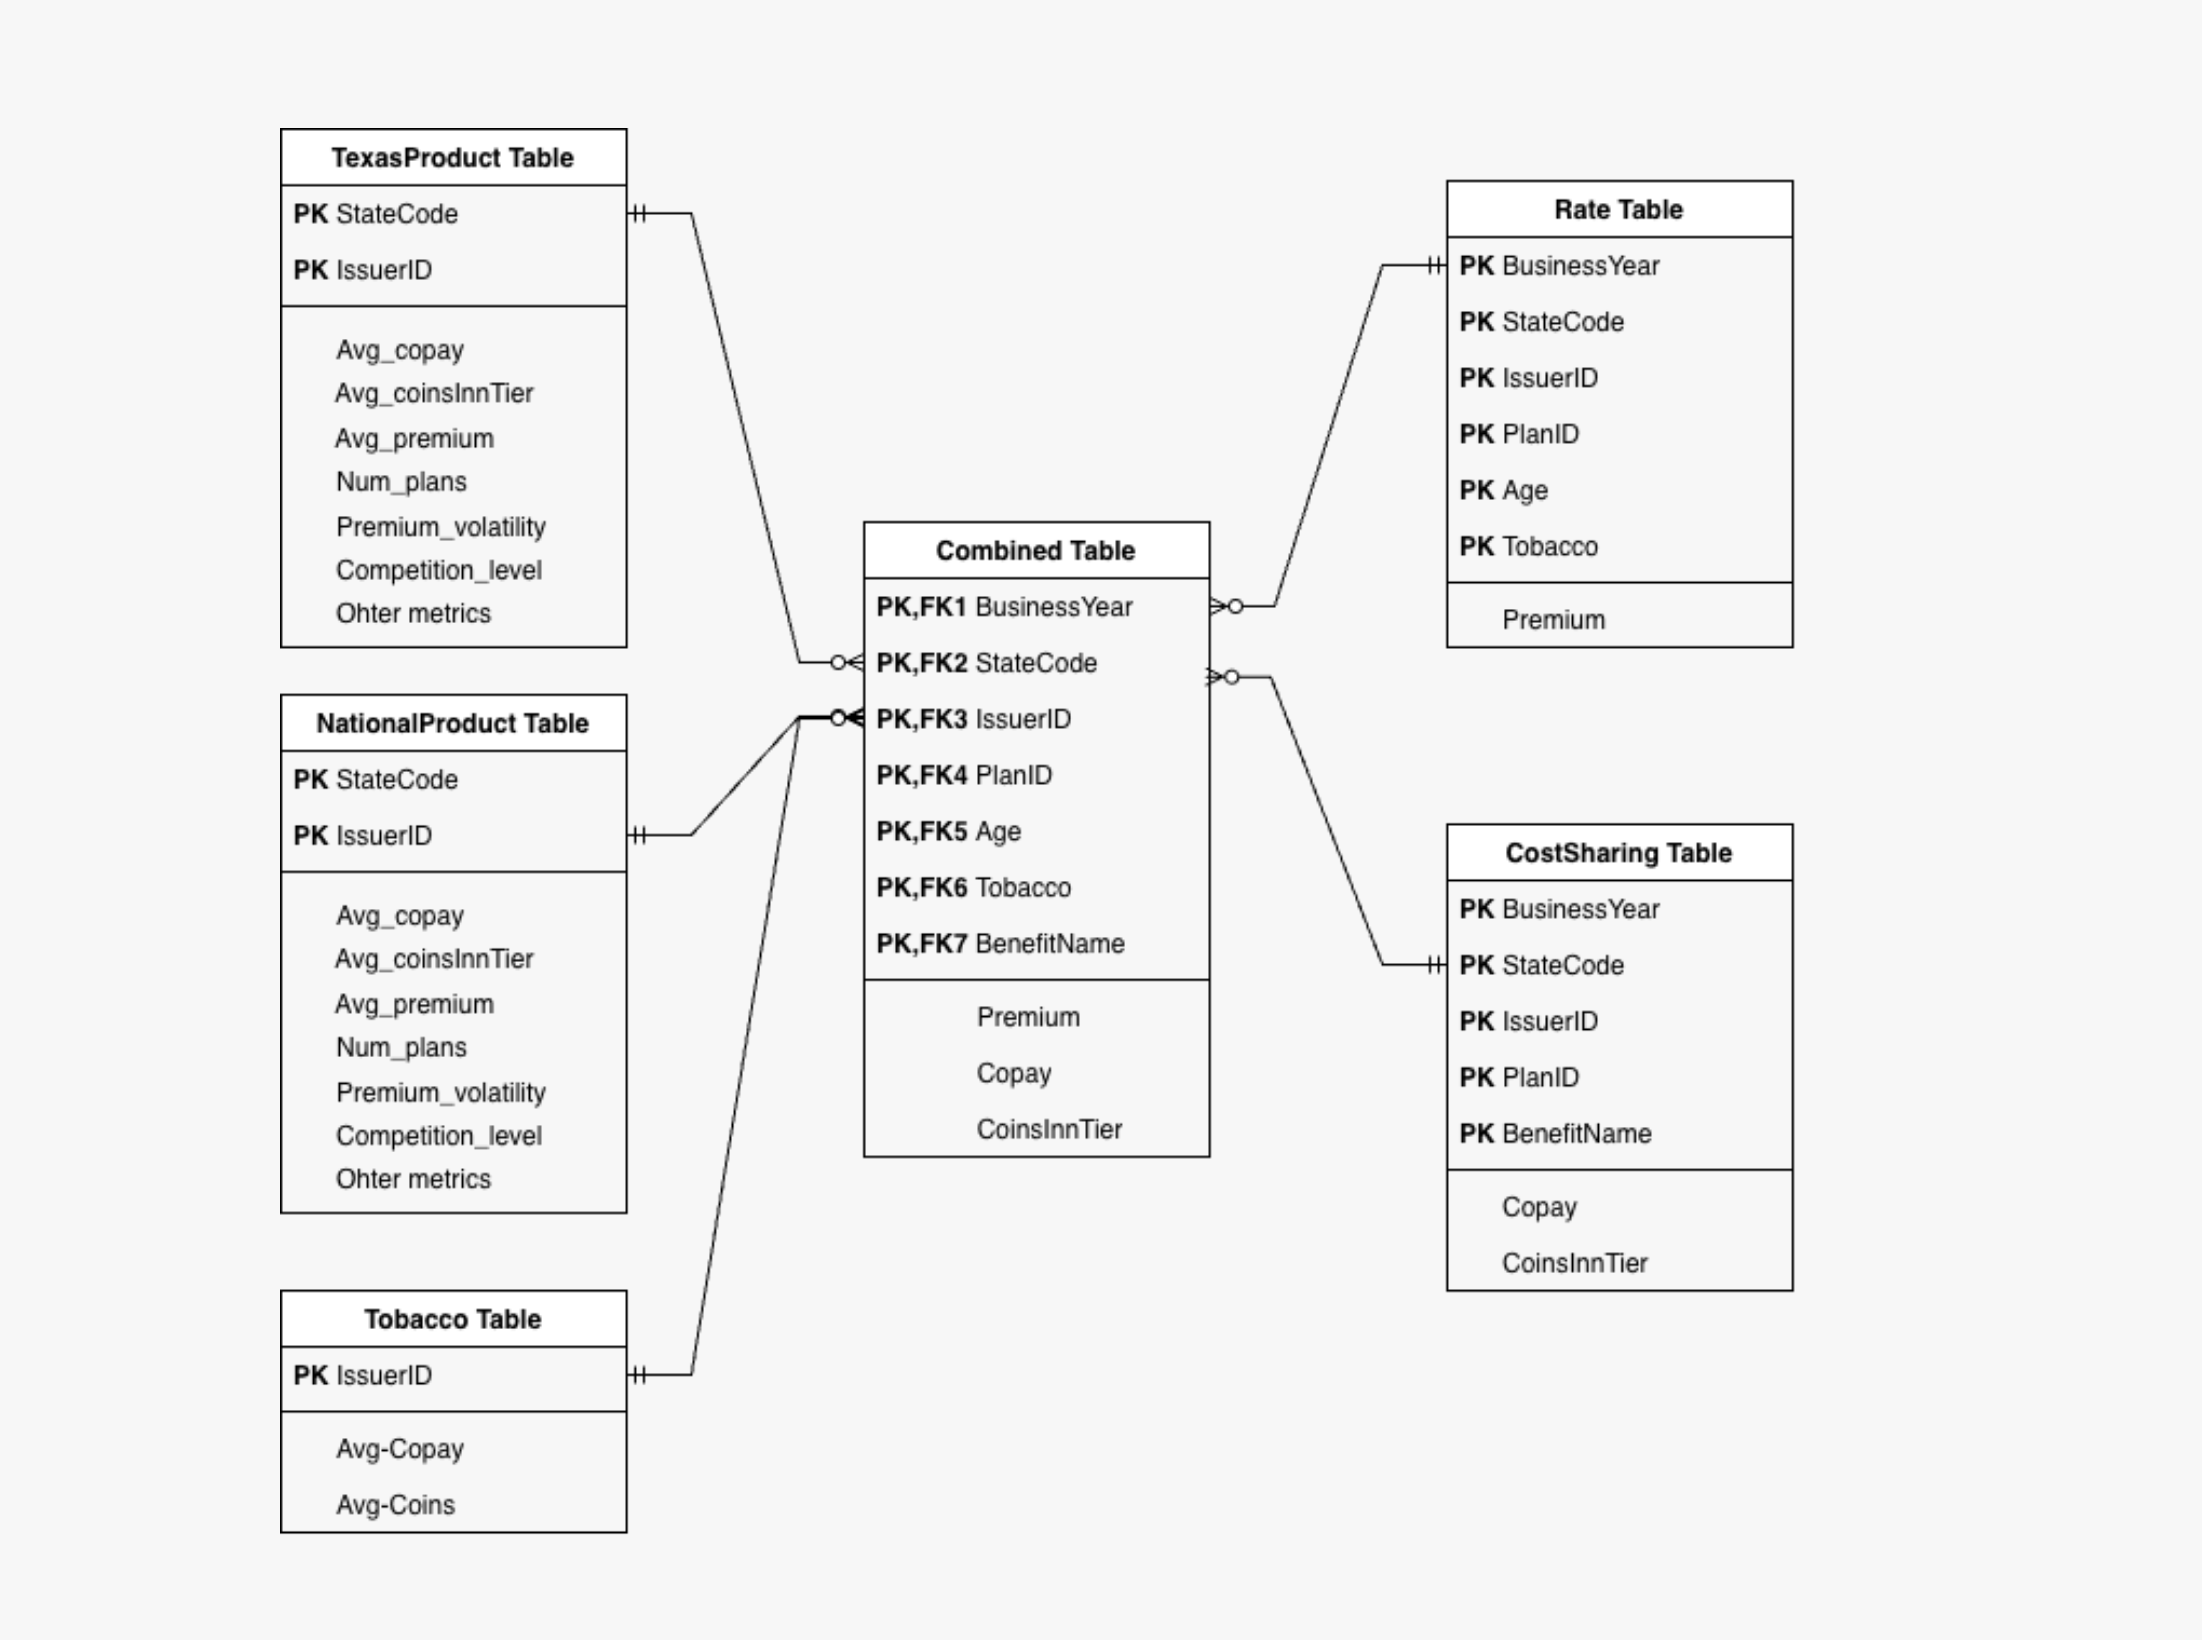

The analysis uses CMS Marketplace PUF data (2015–2016) for Texas, integrating plan premium rates and benefit cost-sharing tables via shared plan identifiers. The ERD summarizes the relational structure that enables plan-level comparisons of premiums, cost-sharing, and tobacco surcharge patterns.






# Data Cleaning Summary (BenefitsCostSharing Table)

To ensure data quality before joining BenefitCostSharing with the rates dataset, we conducted a comprehensive NULL-rate assessment across all fields. Using SQL, we calculated the total number of missing values for every column (e.g., BenefitName, Coinsurance fields, copays, cost-sharing indicators, issuer identifiers, plan identifiers, and metadata fields). Columns with consistently complete data were retained for analysis, while fields with excessive or structurally empty NULLs were excluded to avoid noise, misclassification, or artificial sparsity.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH base AS (
  SELECT
    COUNT(*) AS total_rows,
    COUNTIF(BenefitName IS NULL) AS BenefitName_null_count,
    COUNTIF(BusinessYear IS NULL) AS BusinessYear_null_count,
    COUNTIF(CoinsInnTier1 IS NULL) AS CoinsInnTier1_null_count,
    COUNTIF(CoinsInnTier2 IS NULL) AS CoinsInnTier2_null_count,
    COUNTIF(CoinsOutofNet IS NULL) AS CoinsOutofNet_null_count,
    COUNTIF(CopayInnTier1 IS NULL) AS CopayInnTier1_null_count,
    COUNTIF(CopayInnTier2 IS NULL) AS CopayInnTier2_null_count,
    COUNTIF(CopayOutofNet IS NULL) AS CopayOutofNet_null_count,
    COUNTIF(EHBVarReason IS NULL) AS EHBVarReason_null_count,
    COUNTIF(Exclusions IS NULL) AS Exclusions_null_count,
    COUNTIF(Explanation IS NULL) AS Explanation_null_count,
    COUNTIF(ImportDate IS NULL) AS ImportDate_null_count,
    COUNTIF(IsCovered IS NULL) AS IsCovered_null_count,
    COUNTIF(IsEHB IS NULL) AS IsEHB_null_count,
    COUNTIF(IsExclFromInnMOOP IS NULL) AS IsExclFromInnMOOP_null_count,
    COUNTIF(IsExclFromOonMOOP IS NULL) AS IsExclFromOonMOOP_null_count,
    COUNTIF(IsStateMandate IS NULL) AS IsStateMandate_null_count,
    COUNTIF(IsSubjToDedTier1 IS NULL) AS IsSubjToDedTier1_null_count,
    COUNTIF(IsSubjToDedTier2 IS NULL) AS IsSubjToDedTier2_null_count,
    COUNTIF(IssuerId IS NULL) AS IssuerId_null_count,
    COUNTIF(IssuerId2 IS NULL) AS IssuerId2_null_count,
    COUNTIF(LimitQty IS NULL) AS LimitQty_null_count,
    COUNTIF(LimitUnit IS NULL) AS LimitUnit_null_count,
    COUNTIF(MinimumStay IS NULL) AS MinimumStay_null_count,
    COUNTIF(PlanId IS NULL) AS PlanId_null_count,
    COUNTIF(QuantLimitOnSvc IS NULL) AS QuantLimitOnSvc_null_count,
    COUNTIF(RowNumber IS NULL) AS RowNumber_null_count,
    COUNTIF(SourceName IS NULL) AS SourceName_null_count,
    COUNTIF(StandardComponentId IS NULL) AS StandardComponentId_null_count,
    COUNTIF(StateCode IS NULL) AS StateCode_null_count,
    COUNTIF(StateCode2 IS NULL) AS StateCode2_null_count,
    COUNTIF(VersionNum IS NULL) AS VersionNum_null_count
  FROM `ba775b06teamproject.team.BenefitsCostSharing`
)

SELECT
  total_rows,
  BenefitName_null_count, ROUND(BenefitName_null_count / total_rows, 6) AS BenefitName_null_rate,
  BusinessYear_null_count, ROUND(BusinessYear_null_count / total_rows, 6) AS BusinessYear_null_rate,
  CoinsInnTier1_null_count, ROUND(CoinsInnTier1_null_count / total_rows, 6) AS CoinsInnTier1_null_rate,
  CoinsInnTier2_null_count, ROUND(CoinsInnTier2_null_count / total_rows, 6) AS CoinsInnTier2_null_rate,
  CoinsOutofNet_null_count, ROUND(CoinsOutofNet_null_count / total_rows, 6) AS CoinsOutofNet_null_rate,
  CopayInnTier1_null_count, ROUND(CopayInnTier1_null_count / total_rows, 6) AS CopayInnTier1_null_rate,
  CopayInnTier2_null_count, ROUND(CopayInnTier2_null_count / total_rows, 6) AS CopayInnTier2_null_rate,
  CopayOutofNet_null_count, ROUND(CopayOutofNet_null_count / total_rows, 6) AS CopayOutofNet_null_rate,
  EHBVarReason_null_count, ROUND(EHBVarReason_null_count / total_rows, 6) AS EHBVarReason_null_rate,
  Exclusions_null_count, ROUND(Exclusions_null_count / total_rows, 6) AS Exclusions_null_rate,
  Explanation_null_count, ROUND(Explanation_null_count / total_rows, 6) AS Explanation_null_rate,
  ImportDate_null_count, ROUND(ImportDate_null_count / total_rows, 6) AS ImportDate_null_rate,
  IsCovered_null_count, ROUND(IsCovered_null_count / total_rows, 6) AS IsCovered_null_rate,
  IsEHB_null_count, ROUND(IsEHB_null_count / total_rows, 6) AS IsEHB_null_rate,
  IsExclFromInnMOOP_null_count, ROUND(IsExclFromInnMOOP_null_count / total_rows, 6) AS IsExclFromInnMOOP_null_rate,
  IsExclFromOonMOOP_null_count, ROUND(IsExclFromOonMOOP_null_count / total_rows, 6) AS IsExclFromOonMOOP_null_rate,
  IsStateMandate_null_count, ROUND(IsStateMandate_null_count / total_rows, 6) AS IsStateMandate_null_rate,
  IsSubjToDedTier1_null_count, ROUND(IsSubjToDedTier1_null_count / total_rows, 6) AS IsSubjToDedTier1_null_rate,
  IsSubjToDedTier2_null_count, ROUND(IsSubjToDedTier2_null_count / total_rows, 6) AS IsSubjToDedTier2_null_rate,
  IssuerId_null_count, ROUND(IssuerId_null_count / total_rows, 6) AS IssuerId_null_rate,
  IssuerId2_null_count, ROUND(IssuerId2_null_count / total_rows, 6) AS IssuerId2_null_rate,
  LimitQty_null_count, ROUND(LimitQty_null_count / total_rows, 6) AS LimitQty_null_rate,
  LimitUnit_null_count, ROUND(LimitUnit_null_count / total_rows, 6) AS LimitUnit_null_rate,
  MinimumStay_null_count, ROUND(MinimumStay_null_count / total_rows, 6) AS MinimumStay_null_rate,
  PlanId_null_count, ROUND(PlanId_null_count / total_rows, 6) AS PlanId_null_rate,
  QuantLimitOnSvc_null_count, ROUND(QuantLimitOnSvc_null_count / total_rows, 6) AS QuantLimitOnSvc_null_rate,
  RowNumber_null_count, ROUND(RowNumber_null_count / total_rows, 6) AS RowNumber_null_rate,
  SourceName_null_count, ROUND(SourceName_null_count / total_rows, 6) AS SourceName_null_rate,
  StandardComponentId_null_count, ROUND(StandardComponentId_null_count / total_rows, 6) AS StandardComponentId_null_rate,
  StateCode_null_count, ROUND(StateCode_null_count / total_rows, 6) AS StateCode_null_rate,
  StateCode2_null_count, ROUND(StateCode2_null_count / total_rows, 6) AS StateCode2_null_rate,
  VersionNum_null_count, ROUND(VersionNum_null_count / total_rows, 6) AS VersionNum_null_rate
FROM base;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

# Data Cleaning Summary (BenefitsCostSharing – Field Selection)

After assessing NULL rates across the full BenefitsCostSharing dataset, we created a cleaned subset by selecting only fields that were consistently populated and analytically meaningful for 2015–2016. Using SQL, we filtered the table to retain key cost-sharing attributes (e.g., copays, coinsurance, benefit indicators), issuer and plan identifiers, and regulatory variables. We also restricted records to BusinessYear = 2015 or 2016 to ensure alignment with the rates dataset.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775b06teamproject.team.BenefitsCostSharing_1516` AS
SELECT
  BenefitName,
  BusinessYear,
  CoinsInnTier1,
  CoinsOutofNet,
  CopayInnTier1,
  CopayOutofNet,
  EHBVarReason,
  ImportDate,
  IsCovered,
  IsEHB,
  IsExclFromInnMOOP,
  IsExclFromOonMOOP,
  IsSubjToDedTier1,
  IsSubjToDedTier2,
  IssuerId,
  IssuerId2,
  PlanId,
  QuantLimitOnSvc,
  RowNumber,
  SourceName,
  StandardComponentId,
  StateCode,
  StateCode2,
  VersionNum
FROM `ba775b06teamproject.team.BenefitsCostSharing`
WHERE BusinessYear IN ('2015', '2016');
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

# Data Cleaning Summary (NULL Profiling)

We assessed missingness in the cleaned BenefitsCostSharing_1516 table by calculating NULL counts and NULL-rate percentages for all retained fields. The unpivoted results highlighted several structurally sparse variables, which showed 50–60% missingness. These fields were excluded or deprioritized in later analysis to avoid instability. This step ensured that only consistently populated variables were used when building the final GEORGE_JOIN_TX dataset.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH column_nulls AS (
  SELECT
    COUNT(*) AS total_rows,
    COUNTIF(BenefitName IS NULL) AS null_BenefitName,
    COUNTIF(CoinsInnTier1 IS NULL) AS null_CoinsInnTier1,
    COUNTIF(CoinsOutofNet IS NULL) AS null_CoinsOutofNet,
    COUNTIF(CopayInnTier1 IS NULL) AS null_CopayInnTier1,
    COUNTIF(CopayOutofNet IS NULL) AS null_CopayOutofNet,
    COUNTIF(EHBVarReason IS NULL) AS null_EHBVarReason,
    COUNTIF(IsCovered IS NULL) AS null_IsCovered,
    COUNTIF(IsEHB IS NULL) AS null_IsEHB,
    COUNTIF(IsExclFromInnMOOP IS NULL) AS null_IsExclFromInnMOOP,
    COUNTIF(IsExclFromOonMOOP IS NULL) AS null_IsExclFromOonMOOP,
    COUNTIF(IsSubjToDedTier1 IS NULL) AS null_IsSubjToDedTier1,
    COUNTIF(IsSubjToDedTier2 IS NULL) AS null_IsSubjToDedTier2,
    COUNTIF(QuantLimitOnSvc IS NULL) AS null_QuantLimitOnSvc,
    COUNTIF(StateCode IS NULL) AS null_StateCode,
    COUNTIF(StateCode2 IS NULL) AS null_StateCode2
  FROM `ba775b06teamproject.team.BenefitsCostSharing_1516`
),

unpivot_nulls AS (
  SELECT
    column_name,
    null_count,
    ROUND(null_count / total_rows, 4) AS null_rate
  FROM column_nulls,
  UNNEST([
    STRUCT('BenefitName' AS column_name, null_BenefitName AS null_count),
    STRUCT('CoinsInnTier1', null_CoinsInnTier1),
    STRUCT('CoinsOutofNet', null_CoinsOutofNet),
    STRUCT('CopayInnTier1', null_CopayInnTier1),
    STRUCT('CopayOutofNet', null_CopayOutofNet),
    STRUCT('EHBVarReason', null_EHBVarReason),
    STRUCT('IsCovered', null_IsCovered),
    STRUCT('IsEHB', null_IsEHB),
    STRUCT('IsExclFromInnMOOP', null_IsExclFromInnMOOP),
    STRUCT('IsExclFromOonMOOP', null_IsExclFromOonMOOP),
    STRUCT('IsSubjToDedTier1', null_IsSubjToDedTier1),
    STRUCT('IsSubjToDedTier2', null_IsSubjToDedTier2),
    STRUCT('QuantLimitOnSvc', null_QuantLimitOnSvc),
    STRUCT('StateCode', null_StateCode),
    STRUCT('StateCode2', null_StateCode2)
  ])
)

SELECT *
FROM unpivot_nulls
ORDER BY null_rate DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=15, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

# Rate Table Cleaning (Summary)

For the Rate dataset, we conducted a systematic missing-data assessment to ensure variables were reliable before joining with other tables. We first calculated total row counts and the number of NULL values across all key fields—including BusinessYear, StateCode, IssuerId, PlanId, Age, IndividualRate, Tobacco flags, and household composition variables. We then unpivoted these counts to identify columns with high null-rates.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH column_nulls AS (
  SELECT
    COUNT(*) AS total_rows,
    COUNTIF(BusinessYear IS NULL) AS null_BusinessYear,
    COUNTIF(StateCode IS NULL) AS null_StateCode,
    COUNTIF(IssuerId IS NULL) AS null_IssuerId,
    COUNTIF(SourceName IS NULL) AS null_SourceName,
    COUNTIF(VersionNum IS NULL) AS null_VersionNum,
    COUNTIF(ImportDate IS NULL) AS null_ImportDate,
    COUNTIF(IssuerId2 IS NULL) AS null_IssuerId2,
    COUNTIF(FederalTIN IS NULL) AS null_FederalTIN,
    COUNTIF(RateEffectiveDate IS NULL) AS null_RateEffectiveDate,
    COUNTIF(RateExpirationDate IS NULL) AS null_RateExpirationDate,
    COUNTIF(PlanId IS NULL) AS null_PlanId,
    COUNTIF(RatingAreaId IS NULL) AS null_RatingAreaId,
    COUNTIF(Tobacco IS NULL) AS null_Tobacco,
    COUNTIF(Age IS NULL) AS null_Age,
    COUNTIF(IndividualRate IS NULL) AS null_IndividualRate,
    COUNTIF(IndividualTobaccoRate IS NULL) AS null_IndividualTobaccoRate,
    COUNTIF(Couple IS NULL) AS null_Couple,
    COUNTIF(PrimarySubscriberAndOneDependent IS NULL) AS null_PrimarySubscriberAndOneDependent,
    COUNTIF(PrimarySubscriberAndTwoDependents IS NULL) AS null_PrimarySubscriberAndTwoDependents,
    COUNTIF(PrimarySubscriberAndThreeOrMoreDependents IS NULL) AS null_PrimarySubscriberAndThreeOrMoreDependents,
    COUNTIF(CoupleAndOneDependent IS NULL) AS null_CoupleAndOneDependent,
    COUNTIF(CoupleAndTwoDependents IS NULL) AS null_CoupleAndTwoDependents,
    COUNTIF(CoupleAndThreeOrMoreDependents IS NULL) AS null_CoupleAndThreeOrMoreDependents,
    COUNTIF(RowNumber IS NULL) AS null_RowNumber
  FROM `ba775b06teamproject.team.rates`
),

unpivot_nulls AS (
  SELECT
    column_name,
    null_count,
    ROUND(null_count / total_rows, 6) AS null_rate
  FROM column_nulls,
  UNNEST([
    STRUCT('BusinessYear' AS column_name, null_BusinessYear AS null_count),
    STRUCT('StateCode', null_StateCode),
    STRUCT('IssuerId', null_IssuerId),
    STRUCT('SourceName', null_SourceName),
    STRUCT('VersionNum', null_VersionNum),
    STRUCT('ImportDate', null_ImportDate),
    STRUCT('IssuerId2', null_IssuerId2),
    STRUCT('FederalTIN', null_FederalTIN),
    STRUCT('RateEffectiveDate', null_RateEffectiveDate),
    STRUCT('RateExpirationDate', null_RateExpirationDate),
    STRUCT('PlanId', null_PlanId),
    STRUCT('RatingAreaId', null_RatingAreaId),
    STRUCT('Tobacco', null_Tobacco),
    STRUCT('Age', null_Age),
    STRUCT('IndividualRate', null_IndividualRate),
    STRUCT('IndividualTobaccoRate', null_IndividualTobaccoRate),
    STRUCT('Couple', null_Couple),
    STRUCT('PrimarySubscriberAndOneDependent', null_PrimarySubscriberAndOneDependent),
    STRUCT('PrimarySubscriberAndTwoDependents', null_PrimarySubscriberAndTwoDependents),
    STRUCT('PrimarySubscriberAndThreeOrMoreDependents', null_PrimarySubscriberAndThreeOrMoreDependents),
    STRUCT('CoupleAndOneDependent', null_CoupleAndOneDependent),
    STRUCT('CoupleAndTwoDependents', null_CoupleAndTwoDependents),
    STRUCT('CoupleAndThreeOrMoreDependents', null_CoupleAndThreeOrMoreDependents),
    STRUCT('RowNumber', null_RowNumber)
  ])
)

SELECT *
FROM unpivot_nulls
ORDER BY null_rate DESC, column_name;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=24, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775b06teamproject.team.Rate_cleaned_secondary` AS
SELECT
  BusinessYear,
  StateCode,
  IssuerId,
  SourceName,
  VersionNum,
  ImportDate,
  IssuerId2,
  FederalTIN,
  RateEffectiveDate,
  RateExpirationDate,
  PlanId,
  RatingAreaId,
  Tobacco,
  Age,
  IndividualRate,
  IndividualTobaccoRate,


FROM `ba775b06teamproject.team.rates`
WHERE BusinessYear IN (2015, 2016);
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

# State-Level Validation (Row Distribution Check)

To ensure our cleaned rate dataset was complete and representative, we conducted a state-level validation by aggregating row counts across all states. For each state, we computed both the total number of rate records and the subset belonging to 2015–2016. We then calculated each state’s share of 2015–2016 observations and its contribution to the overall dataset. This step confirmed that Texas—and other large-population states—were appropriately represented, with no missing states or unexpected gaps, validating the reliability of our cleaned Rate table prior to joining.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """

WITH state_stats AS (
  SELECT
    StateCode,
    COUNT(*) AS total_rows,
    COUNTIF(BusinessYear IN (2015, 2016)) AS count_1516
  FROM `ba775b06teamproject.team.Rate_cleaned_secondary`
  WHERE StateCode IS NOT NULL
  GROUP BY StateCode
),


overall AS (
  SELECT SUM(total_rows) AS all_rows
  FROM state_stats
)


SELECT
  s.StateCode,
  s.total_rows,
  s.count_1516,
  ROUND(s.count_1516 / s.total_rows, 4) AS proportion_1516_in_state,
  ROUND(s.total_rows / o.all_rows, 4) AS proportion_state_total
FROM state_stats s, overall o
ORDER BY s.total_rows DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=38, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

During the null-value inspection of the Rate dataset, all “family tier”–related premium fields (e.g., Couple, PrimarySubscriberAndDependents series) were found to be entirely null across all 11.9 million rows.
This indicates that the Marketplace rate files report individual premiums only, with family rates derived algorithmically rather than stored explicitly.
Therefore, these columns will be dropped to reduce redundancy and data volume.

The IndividualTobaccoRate column shows approximately 59 % nulls, which aligns with the fact that not all states implement or report separate tobacco-use rating factors.
Retaining this variable allows state-level policy comparisons on tobacco surcharges.

Core identifiers such as Age and BusinessYear have no missing values and will remain as key variables for further analysis.

CREATE JOINED TABLE

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775b06teamproject.team.GEORGE_JOIN_TX` AS
WITH

rates AS (
  SELECT
    r.BusinessYear,
    r.StateCode,
    r.IssuerId,
    r.PlanId,
    r.Age,
    r.Tobacco,
    r.IndividualRate,
    r.IndividualTobaccoRate,
    r.SourceName AS RateSource
  FROM `ba775b06teamproject.team.Rate_cleaned_secondary` r
  WHERE BusinessYear IN (2015, 2016)
    AND StateCode = 'TX'
    AND COALESCE(TRIM(Tobacco), '') <> ''
),


bcs AS (
  SELECT
    SAFE_CAST(BusinessYear AS INT64)            AS BusinessYear,
    COALESCE(StateCode, StateCode2)             AS BCS_StateCode,
    SAFE_CAST(IssuerId AS INT64)                AS IssuerId,
    StandardComponentId,
    PlanId,
    BenefitName,
    SourceName  AS BCS_SourceName,
    VersionNum  AS BCS_VersionNum,
    ImportDate  AS BCS_ImportDate,
    IsCovered, IsEHB, EHBVarReason,
    IsExclFromInnMOOP, IsExclFromOonMOOP,
    IsSubjToDedTier1, IsSubjToDedTier2,
    QuantLimitOnSvc,

    --
    CopayInnTier1, CopayOutofNet,
    CoinsInnTier1, CoinsOutofNet,

    --
    REGEXP_REPLACE(
      TRIM(REGEXP_REPLACE(LOWER(IFNULL(CopayInnTier1,'')), r'copay', '')),
      r'[\$,]', ''
    ) AS CopayInnTier1_clean,

    REGEXP_REPLACE(
      TRIM(REGEXP_REPLACE(LOWER(IFNULL(CopayOutofNet,'')), r'copay', '')),
      r'[\$,]', ''
    ) AS CopayOutofNet_clean,

    --
    REGEXP_REPLACE(
      TRIM(REGEXP_REPLACE(LOWER(IFNULL(CoinsInnTier1,'')), r'coinsurance', '')),
      r'%', ''
    ) AS CoinsInnTier1_clean,

    REGEXP_REPLACE(
      TRIM(REGEXP_REPLACE(LOWER(IFNULL(CoinsOutofNet,'')), r'coinsurance', '')),
      r'%', ''
    ) AS CoinsOutofNet_clean,

    --
    SAFE_CAST(REGEXP_EXTRACT(CopayInnTier1, r'([0-9]+(?:\.[0-9]+)?)') AS FLOAT64) AS CopayInnTier1_num,
    SAFE_CAST(REGEXP_EXTRACT(CopayOutofNet, r'([0-9]+(?:\.[0-9]+)?)') AS FLOAT64) AS CopayOutofNet_num,
    SAFE_CAST(REGEXP_EXTRACT(CoinsInnTier1, r'([0-9]+(?:\.[0-9]+)?)') AS FLOAT64) AS CoinsInnTier1_pct,
    SAFE_CAST(REGEXP_EXTRACT(CoinsOutofNet, r'([0-9]+(?:\.[0-9]+)?)') AS FLOAT64) AS CoinsOutofNet_pct

  FROM `ba775b06teamproject.team.BenefitsCostSharing_1516`
)


SELECT
  r.*,
  b.StandardComponentId,
  b.PlanId AS BCS_PlanId,
  b.BenefitName,
  b.BCS_SourceName,
  b.BCS_VersionNum,
  b.BCS_ImportDate,
  b.IsCovered, b.IsEHB, b.EHBVarReason,
  b.IsExclFromInnMOOP, b.IsExclFromOonMOOP,
  b.IsSubjToDedTier1, b.IsSubjToDedTier2,
  b.QuantLimitOnSvc,

  --
  b.CopayInnTier1, b.CopayOutofNet,
  b.CoinsInnTier1, b.CoinsOutofNet,
  b.CopayInnTier1_clean, b.CopayOutofNet_clean,
  b.CoinsInnTier1_clean, b.CoinsOutofNet_clean,
  b.CopayInnTier1_num, b.CopayOutofNet_num,
  b.CoinsInnTier1_pct, b.CoinsOutofNet_pct

FROM rates r
JOIN bcs b
  ON r.BusinessYear = b.BusinessYear
 AND TRIM(r.StateCode) = TRIM(b.BCS_StateCode)
 AND r.IssuerId = b.IssuerId
 AND TRIM(r.PlanId) = TRIM(b.StandardComponentId);

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

<>:49: SyntaxWarning: invalid escape sequence '\$'
<>:49: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1088062481.py:49: SyntaxWarning: invalid escape sequence '\$'
  r'[\$,]', ''


TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775b06teamproject.team.GEORGE_JOIN_TX` AS
WITH

rates AS (
  SELECT
    r.BusinessYear,
    r.StateCode,
    r.IssuerId,
    r.PlanId,
    r.Age,
    r.Tobacco,
    r.IndividualRate,
    r.IndividualTobaccoRate,
    r.SourceName AS RateSource
  FROM `ba775b06teamproject.team.Rate_cleaned_secondary` r
  WHERE BusinessYear IN (2015, 2016)
    AND StateCode = 'TX'
    AND COALESCE(TRIM(Tobacco), '') <> ''
),


bcs AS (
  SELECT
    SAFE_CAST(BusinessYear AS INT64)  AS BusinessYear,
    COALESCE(StateCode, StateCode2)   AS BCS_StateCode,
    SAFE_CAST(IssuerId AS INT64)      AS IssuerId,
    StandardComponentId,
    PlanId,
    BenefitName,
    SourceName AS BCS_SourceName,
    VersionNum AS BCS_VersionNum,


    ImportDate AS BCS_ImportDate_raw,

    CASE

      WHEN REGEXP_CONTAINS(
        ImportDate,
        '^[0-9]{{4}}-[0-9]{{2}}-[0-9]{{2}}'
      ) THEN PARSE_TIMESTAMP('%Y-%m-%d %H:%M:%S', ImportDate)


      WHEN REGEXP_CONTAINS(
        ImportDate,
        '^[0-9]{{1,2}}/[0-9]{{1,2}}/[0-9]{{4}}'
      ) THEN PARSE_TIMESTAMP('%m/%d/%Y %H:%M', ImportDate)

      ELSE NULL
    END AS BCS_ImportDate,

    IsCovered, IsEHB, EHBVarReason,
    IsExclFromInnMOOP, IsExclFromOonMOOP,
    IsSubjToDedTier1, IsSubjToDedTier2,
    QuantLimitOnSvc,

    CopayInnTier1,
    CopayOutofNet,
    CoinsInnTier1,
    CoinsOutofNet,

    REGEXP_REPLACE(
      TRIM(REGEXP_REPLACE(LOWER(IFNULL(CopayInnTier1,'')), r'copay', '')),
      r'[\$,]', ''
    ) AS CopayInnTier1_clean,

    REGEXP_REPLACE(
      TRIM(REGEXP_REPLACE(LOWER(IFNULL(CopayOutofNet,'')), r'copay', '')),
      r'[\$,]', ''
    ) AS CopayOutofNet_clean,

    REGEXP_REPLACE(
      TRIM(REGEXP_REPLACE(LOWER(IFNULL(CoinsInnTier1,'')), r'coinsurance', '')),
      r'%', ''
    ) AS CoinsInnTier1_clean,

    REGEXP_REPLACE(
      TRIM(REGEXP_REPLACE(LOWER(IFNULL(CoinsOutofNet,'')), r'coinsurance', '')),
      r'%', ''
    ) AS CoinsOutofNet_clean,

    SAFE_CAST(REGEXP_EXTRACT(CopayInnTier1, r'([0-9]+(?:\.[0-9]+)?)') AS FLOAT64) AS CopayInnTier1_num,
    SAFE_CAST(REGEXP_EXTRACT(CopayOutofNet, r'([0-9]+(?:\.[0-9]+)?)') AS FLOAT64) AS CopayOutofNet_num,
    SAFE_CAST(REGEXP_EXTRACT(CoinsInnTier1, r'([0-9]+(?:\.[0-9]+)?)') AS FLOAT64) AS CoinsInnTier1_pct,
    SAFE_CAST(REGEXP_EXTRACT(CoinsOutofNet, r'([0-9]+(?:\.[0-9]+)?)') AS FLOAT64) AS CoinsOutofNet_pct

  FROM `ba775b06teamproject.team.BenefitsCostSharing_1516`
)


SELECT
  r.*,
  b.StandardComponentId,
  b.PlanId AS BCS_PlanId,
  b.BenefitName,
  b.BCS_SourceName,
  b.BCS_VersionNum,


  b.BCS_ImportDate_raw,
  b.BCS_ImportDate,

  b.IsCovered, b.IsEHB, b.EHBVarReason,
  b.IsExclFromInnMOOP, b.IsExclFromOonMOOP,
  b.IsSubjToDedTier1, b.IsSubjToDedTier2,
  b.QuantLimitOnSvc,

  b.CopayInnTier1, b.CopayOutofNet,
  b.CoinsInnTier1, b.CoinsOutofNet,
  b.CopayInnTier1_clean, b.CopayOutofNet_clean,
  b.CoinsInnTier1_clean, b.CoinsOutofNet_clean,
  b.CopayInnTier1_num, b.CopayOutofNet_num,
  b.CoinsInnTier1_pct, b.CoinsOutofNet_pct

FROM rates r
JOIN bcs b
  ON r.BusinessYear = b.BusinessYear
 AND TRIM(r.StateCode) = TRIM(b.BCS_StateCode)
 AND r.IssuerId = b.IssuerId
 AND TRIM(r.PlanId) = TRIM(b.StandardComponentId);
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

<>:68: SyntaxWarning: invalid escape sequence '\$'
<>:68: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1532259473.py:68: SyntaxWarning: invalid escape sequence '\$'
  r'[\$,]', ''


TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

# JOIN TABLE

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775b06teamproject.team.GEORGE_JOIN_US` AS
WITH

rates AS (
  SELECT
    r.BusinessYear,
    r.StateCode,
    SAFE_CAST(r.IssuerId AS INT64) AS IssuerId,
    TRIM(r.PlanId) AS PlanId,
    r.Age,
    r.Tobacco,
    SAFE_CAST(r.IndividualRate AS FLOAT64) AS IndividualRate,
    SAFE_CAST(r.IndividualTobaccoRate AS FLOAT64) AS IndividualTobaccoRate,
    r.SourceName AS RateSource
  FROM `ba775b06teamproject.team.Rate_cleaned_secondary` r
  WHERE BusinessYear IN (2014, 2015, 2016)
),


bcs AS (
  SELECT
    SAFE_CAST(BusinessYear AS INT64) AS BusinessYear,
    COALESCE(StateCode, StateCode2) AS BCS_StateCode,
    SAFE_CAST(IssuerId AS INT64) AS IssuerId,
    TRIM(StandardComponentId) AS StandardComponentId,
    TRIM(PlanId) AS BCS_PlanId,
    BenefitName,


    SAFE_CAST(REGEXP_EXTRACT(LOWER(CoinsInnTier1), r'([0-9.]+)') AS FLOAT64) AS CoinsInnTier1,
    SAFE_CAST(REGEXP_EXTRACT(LOWER(CoinsOutofNet), r'([0-9.]+)') AS FLOAT64) AS CoinsOutofNet,


    SAFE_CAST(REGEXP_EXTRACT(LOWER(CopayInnTier1), r'([0-9.]+)') AS FLOAT64) AS CopayInnTier1,
    SAFE_CAST(REGEXP_EXTRACT(LOWER(CopayOutofNet), r'([0-9.]+)') AS FLOAT64) AS CopayOutofNet
  FROM `ba775b06teamproject.team.BenefitsCostSharing_1516`
)


SELECT
  r.BusinessYear,
  r.StateCode,
  r.IssuerId,
  r.PlanId,
  r.Age,
  r.Tobacco,
  r.IndividualRate,
  r.IndividualTobaccoRate,
  r.RateSource,

  b.BenefitName,
  b.CoinsInnTier1,
  b.CoinsOutofNet,
  b.CopayInnTier1,
  b.CopayOutofNet
FROM rates r
JOIN bcs b
  ON r.BusinessYear = b.BusinessYear
 AND r.IssuerId = b.IssuerId
 AND TRIM(r.PlanId) = TRIM(b.StandardComponentId);
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

# **Part 1. Premium Structure Across States**







## **1.1** Method Note: Standardizing Premiums and ACA Age-Rating Framework


> To ensure consistency in cross-state premium comparisons, we standardize on age 34, the modal age in marketplace filings. Using a single benchmark age eliminates demographic mix bias and aligns with CMS practice.





> Although our main analysis uses the Texas-joined table (GEORGE_JOIN_TX) for detailed state-level exploration, all cross-state comparisons rely on the national table (GEORGE_JOIN_US) to ensure consistent benchmarking across all states.






> Additionally, the Affordable Care Act imposes a 3:1 federal age-rating limit, meaning a 64-year-old cannot be charged more than triple the premium of a 21-year-old for the same plan. We therefore compute:

- Median standardized premiums for age 34 (affordability baseline)
- Rate_64 / Rate_21 (fairness & age-pricing intensity metric)

>This framework anchors all subsequent premium and fairness comparisons.

##**1.2** Question 1 --- Median Standardized Premiums (Age 34) TX


In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  Age,
  COUNT(*) AS AgeCount
FROM ba775b06teamproject.team.GEORGE_JOIN_TX
WHERE
  REGEXP_CONTAINS(Age, r'^[0-9]+$')
  AND SAFE_CAST(Age AS INT64) BETWEEN 0 AND 120
GROUP BY Age
ORDER BY AgeCount DESC
LIMIT 1;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Insight**

> Our analysis confirms that age 34 is the most frequently priced age in Texas

> Our Texas-specific analysis shows that age 28 is the most frequently priced adult age. Because age 28 lies within the ACA’s standard adult rating band (ages 27–34), it is consistent with federal pricing patterns.

> Therefore, using age 34 as the benchmark for standardized comparisons remains appropriate, as 28 and 34 fall within the same actuarially stable portion of the age-rating curve. Premiums for 34-year-olds in Texas still provide an accurate baseline representation of typical adult marketplace pricing.

## **1.3** Question 2 --- How does Texas compare to other states in median standardized premiums for age 34?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
    StateCode,
    APPROX_QUANTILES(IndividualRate, 100)[OFFSET(50)] AS MedianStandardizedPremium
FROM
    ba775b06teamproject.team.GEORGE_JOIN_US
WHERE
    Age = '34'
    AND IndividualRate IS NOT NULL
GROUP BY
    StateCode
ORDER BY
    MedianStandardizedPremium DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=38, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Insight:**

>Cross-state comparison of median standardized premiums for age 34 shows exceptionally wide variation in pricing across the Marketplace.

>States such as Alaska (534 dollars) and Wyoming (442 dollars) sit at the extreme high end, with premiums nearly 80% higher than those in lower-cost states like Kansas and New Mexico. In this distribution, Texas’s median premium of 296.49 ranks 29th out of 39, placing it comfortably within the lower-cost tier.

> Texas provides a useful reference point for studying how age-rating, network design, insurer behavior, and tobacco surcharges influence overall affordability within a state that is neither unusually cheap nor prohibitively expensive.


## **1.4** Question 3 --- How much more do 64-year-old adults pay compared to 21-year-olds for the same Marketplace plan in each state, and which states approach or fall below the ACA’s 3:1 federal age-rating limit?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH AgeRates AS (
    SELECT
        StateCode,
        PlanId,
        IndividualRate,
        Age
    FROM
        ba775b06teamproject.team.GEORGE_JOIN_US
    WHERE
        Age IN ('64', '21')
        AND IndividualRate IS NOT NULL
),
BandingFactors AS (
    SELECT
        StateCode,
        MAX(CASE WHEN Age = '64' THEN IndividualRate END) /
        MAX(CASE WHEN Age = '21' THEN IndividualRate END) AS RateBandingFactor
    FROM
        AgeRates
    GROUP BY
        StateCode,
        PlanId
    HAVING
        MAX(CASE WHEN Age = '64' THEN IndividualRate END) IS NOT NULL AND
        MAX(CASE WHEN Age = '21' THEN IndividualRate END) IS NOT NULL
)
SELECT
    StateCode,
    AVG(RateBandingFactor) AS AverageAgeBandingFactor
FROM
    BandingFactors
GROUP BY
    StateCode
ORDER BY
    AverageAgeBandingFactor DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=38, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Insight**
>State-level age-rating ratios show that older adults (age 64) consistently pay 2.0–2.9× the premiums of young adults (age 21), approaching—but not exceeding—the ACA’s legal 3:1 limit. Wisconsin, Illinois, and Texas form the steepest age-pricing cluster, with ratios of 2.90, 2.86, and 2.85, placing Texas 3rd-highest nationally in age-based premium intensity.

>By contrast, states such as New Jersey (2.09) and Alabama (1.97) have far flatter age-rating curves, meaning older adults face significantly less age-based cost escalation. These differences indicate large cross-state variation in how insurers apply the ACA age-rating curve, even though all states comply with the federal ceiling.

>Texas exhibits one of the steepest premium increases from age 21 to 64, suggesting that while Texas is moderately priced for 34-year-old adults, it imposes a relatively heavy affordability burden on older consumers compared to most other states.


## **Part 1 section takeaway**
>Overall, Texas presents a moderately priced premium baseline for age-34 adults, with costs notably lower than high-premium states such as Alaska and Wyoming. However, when examining age-rating fairness, Texas shifts sharply upward: it holds the third-steepest age-rating factor in the country, with 64-year-olds paying nearly 2.85× the premiums of 21-year-olds. Together, these findings show that while Texas is affordable for middle-aged consumers, it imposes a substantially heavier burden on older adults compared to most other states.

#**Part 2:** Network burden and market stability

## **2.1** Question 4 ---  For specialist care, which states expose consumers to the greatest out of network financial risk, based on the ratio of out of network to in network coinsurance?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH OON_Ratios AS (
  SELECT
    StateCode,
    PlanId,
    BenefitName,
    SAFE_DIVIDE(CoinsOutofNet, CoinsInnTier1) AS OON_to_INN_Ratio
  FROM `ba775b06teamproject.team.GEORGE_JOIN_US`
  WHERE BenefitName LIKE '%Specialist%'
    AND CoinsOutofNet IS NOT NULL
    AND CoinsInnTier1 IS NOT NULL
    AND CoinsInnTier1 > 0
    AND BusinessYear IN (2015, 2016)
),

StateRisk AS (
  SELECT
    StateCode,
    AVG(OON_to_INN_Ratio) AS Avg_OON_Risk
  FROM OON_Ratios
  GROUP BY StateCode
),

Ranked AS (
  SELECT
    StateCode,
    Avg_OON_Risk,
    RANK() OVER (ORDER BY Avg_OON_Risk DESC) AS Risk_Rank
  FROM StateRisk
)

SELECT *
FROM Ranked
ORDER BY Risk_Rank;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=37, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

> **Insight:**

>Our analysis finds extremely large interstate disparities in out-of-network (OON) financial exposure for specialist care. States such as Delaware (5.92), Alabama (5.54), and Indiana (5.10) pose the highest OON cost burdens, requiring consumers to pay five to six times the in-network coinsurance rate when going out-of-network. These levels represent severe affordability and protection gaps for patients needing specialist services.

> In contrast, states like Wyoming (1.29), Montana (1.59), and Alaska (1.60) show much smaller OON–INN disparities, suggesting more balanced network designs or stronger consumer protections. The large variation—spanning nearly a 6× difference compared to Delaware.

> Texas ranks 19th, with an average OON-to-INN ratio of 2.82, placing it near the national midpoint. While OON specialist care is still more expensive than in-network care in Texas, it is far less punitive than in the highest-risk states. The results indicate that national OON cost exposure is highly uneven, and Texas occupies a moderate-risk, not high-risk, position.


## **2.1** Question 5 --- Does having more insurers in a state (higher competition) make premiums more or less volatile between 2015 and 2016? And where does Texas stand in this trade-off?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """

WITH StatePremium AS (
    SELECT
        StateCode,
        BusinessYear,
        APPROX_QUANTILES(
            CASE WHEN Age = '34' THEN IndividualRate END,
            100
        )[OFFSET(50)] * 12 AS MedianPremium
    FROM `ba775b06teamproject.team.GEORGE_JOIN_US`
    WHERE BusinessYear IN (2015, 2016)
      AND IndividualRate IS NOT NULL
      AND Age = '34'
    GROUP BY StateCode, BusinessYear
),


PremiumChange AS (
    SELECT
        StateCode,
        LAG(MedianPremium) OVER (PARTITION BY StateCode ORDER BY BusinessYear) AS Premium2015,
        MedianPremium AS Premium2016
    FROM StatePremium
),


Volatility AS (
    SELECT
        StateCode,
        SAFE_DIVIDE(Premium2016 - Premium2015, Premium2015) AS PremiumVolatility
    FROM PremiumChange
    WHERE Premium2015 IS NOT NULL
),


Competition AS (
    SELECT
        StateCode,
        COUNT(DISTINCT IssuerId) AS CompetitionLevel
    FROM `ba775b06teamproject.team.GEORGE_JOIN_US`
    WHERE BusinessYear IN (2015, 2016)
    GROUP BY StateCode
),


Joined AS (
    SELECT
        v.StateCode,
        v.PremiumVolatility,
        c.CompetitionLevel,
        RANK() OVER (ORDER BY v.PremiumVolatility DESC) AS VolatilityRank,
        RANK() OVER (ORDER BY c.CompetitionLevel DESC) AS CompetitionRank
    FROM Volatility v
    JOIN Competition c USING (StateCode)
)

SELECT *
FROM Joined
ORDER BY VolatilityRank;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=37, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Insight**
> Our two-year analysis reveals that premium changes between 2015 and 2016 vary widely across states. Some states, such as Kansas (≈17.6%), Utah (≈16.8%), Georgia (≈16.6%), and Oregon (≈16.5%), experienced sharp premium increases, indicating unstable pricing environments. In comparison, several states—including Florida,  North Dakota, and Indiana—actually saw declines in median premiums, resulting in negative volatility measures.

> Texas stands out as a particularly interesting case.
It has the highest competition level in the country (40 participating issuers, CompetitionRank = 1), yet its premium volatility is relatively low: only about a 2.5% increase from 2015 to 2016, ranking 28th out of 37 in volatility.

>This suggests that in Texas, a highly competitive marketplace does not translate into chaotic or disruptive price swings. Instead, Texas appears to balance high insurer participation with relatively stable premiums, making it a strong example of a market where competition coexists with predictability.


## **2.2** QUESTION 6 --- Do states that experience insurer exits suffer larger premium disruptions compared to states with stable insurer presence?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH IssuerCount AS (
    SELECT
        StateCode,
        BusinessYear,
        COUNT(DISTINCT IssuerId) AS NumIssuers
    FROM `ba775b06teamproject.team.GEORGE_JOIN_US`
    WHERE BusinessYear IN (2015, 2016)
    GROUP BY StateCode, BusinessYear
),

IssuerExit AS (
    SELECT
        StateCode,
        MAX(CASE WHEN BusinessYear = 2015 THEN NumIssuers END) AS Issuers2015,
        MAX(CASE WHEN BusinessYear = 2016 THEN NumIssuers END) AS Issuers2016,
        SAFE_SUBTRACT(
            MAX(CASE WHEN BusinessYear = 2016 THEN NumIssuers END),
            MAX(CASE WHEN BusinessYear = 2015 THEN NumIssuers END)
        ) AS IssuerChange
    FROM IssuerCount
    GROUP BY StateCode
),

StatePremium AS (
    SELECT
        StateCode,
        BusinessYear,
        APPROX_QUANTILES(
            CASE WHEN Age = '34' THEN IndividualRate END,
            100
        )[OFFSET(50)] * 12 AS MedianAnnualPremium
    FROM `ba775b06teamproject.team.GEORGE_JOIN_US`
    WHERE BusinessYear IN (2015, 2016)
      AND Age = '34'
      AND IndividualRate IS NOT NULL
    GROUP BY StateCode, BusinessYear
),

PremiumShock AS (
    SELECT
        StateCode,
        MAX(CASE WHEN BusinessYear = 2015 THEN MedianAnnualPremium END) AS Premium2015,
        MAX(CASE WHEN BusinessYear = 2016 THEN MedianAnnualPremium END) AS Premium2016,
        SAFE_DIVIDE(
            MAX(CASE WHEN BusinessYear = 2016 THEN MedianAnnualPremium END) -
            MAX(CASE WHEN BusinessYear = 2015 THEN MedianAnnualPremium END),
            MAX(CASE WHEN BusinessYear = 2015 THEN MedianAnnualPremium END)
        ) AS PremiumShockRatio
    FROM StatePremium
    GROUP BY StateCode
),

Final AS (
    SELECT
        e.StateCode,
        e.Issuers2015,
        e.Issuers2016,
        e.IssuerChange,
        s.PremiumShockRatio,
        RANK() OVER (ORDER BY s.PremiumShockRatio DESC) AS ShockRank,
        RANK() OVER (ORDER BY e.IssuerChange ASC) AS ExitRank
    FROM IssuerExit e
    JOIN PremiumShock s USING (StateCode)
)

SELECT *
FROM Final
ORDER BY ShockRank;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=38, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Insight**
> The 2015–2016 data shows no clear relationship between insurer exits and premium shocks across states. Several states with the largest marketplace withdrawals, including Nevada (–5 issuers), Utah (–4), and Oregon (–3), exhibit only moderate premium increases (0.07–0.17), placing them far below the top of the shock rankings.

> In contrast, the states with the largest premium spikes—such as Kansas (+17.6%), Utah (+16.8%), and Georgia (+16.5%)—did not experience major insurer exits, suggesting that pricing shocks stem from factors other than competition loss, such as actuarial recalibration or risk-pool deterioration.

> Texas provides a particularly strong counterexample: despite gaining four new insurers (CompetitionRank = 1), premiums increased only 2.5%, ranking 28th in volatility. This indicates that insurer entry does not destabilize pricing; if anything, it coincides with greater premium stability.

> Overall, premium disruption in 2016 is not systematically linked to insurer exits.

## **2.3** QUESTION 7 --- How do average individual premiums in each state compare to the national median, and where does Texas sit in this broader price context?


In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """

WITH nation AS (
  SELECT
    APPROX_QUANTILES(IndividualRate, 100)[OFFSET(50)] AS nat_median
  FROM `ba775b06teamproject.team.GEORGE_JOIN_US`
  WHERE IndividualRate IS NOT NULL
),

state_avg AS (
  SELECT
    StateCode,
    AVG(IndividualRate) AS avg_rate
  FROM (
    SELECT
      StateCode,
      IndividualRate
    FROM `ba775b06teamproject.team.GEORGE_JOIN_US`
    WHERE IndividualRate IS NOT NULL   -- keep only valid rates
  )
  GROUP BY StateCode
)


SELECT
  s.StateCode,
  ROUND(s.avg_rate, 2) AS avg_premium,
  ROUND(n.nat_median, 2) AS national_median,
  ROUND(s.avg_rate / n.nat_median, 3) AS relative_index
FROM state_avg s
CROSS JOIN nation n
ORDER BY
  CASE WHEN s.StateCode = 'TX' THEN 0 ELSE 1 END,
  relative_index DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=38, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Insight**
> Average Marketplace premiums vary widely across states when benchmarked against the national median of $391.86. Alaska and Wyoming remain clear high-cost outliers, with premiums 87% and 51% above the national median, while several Midwestern and Western states—such as Kansas and New Mexico—price 15–16% below the national benchmark.

> Texas sits slightly above the national median with a relative index of 1.057, meaning its average premiums are about 5.7% higher than the national midpoint. This places Texas firmly in the upper-middle cost tier: more expensive than low-cost states but far below the extreme outliers.

> Overall, Texas does not stand out as unusually high-priced; rather, it occupies a moderately elevated cost position within the national landscape.

## **Part 2 Take Away**
> Across states, network structure and insurer participation produce highly uneven affordability risks, but Texas consistently emerges as a relatively stable market.

> Out-of-network exposure and premium volatility vary widely nationwide, yet Texas combines the highest insurer participation with low volatility and moderate OON risk, indicating that competition in Texas enhances stability rather than driving price swings.

> Overall, Texas occupies a middle-to-upper cost position—slightly above the national median—but avoids the extreme pricing shocks and affordability hazards seen in many other states.

#**Part 3: pricing fairness and Tobacco**

## **3.1 QUESTION 8:** Do higher-premium plans provide lower cost-sharing at the plan level in Texas?


Part 1

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH plan_premium AS (
  SELECT
    PlanId,
    AVG(IndividualRate) AS avg_premium
  FROM `ba775b06teamproject.team.GEORGE_JOIN_TX`
  WHERE IndividualRate IS NOT NULL
  GROUP BY PlanId
),
bin_summary AS (
  SELECT
    ROUND(avg_premium / 25) * 25 AS premium_bin,
    COUNT(*) AS plan_count
  FROM plan_premium
  GROUP BY premium_bin
)
SELECT
  premium_bin,
  plan_count,
  ROUND(plan_count * 100.0 / SUM(plan_count) OVER (), 2) AS percent_share
FROM bin_summary
ORDER BY percent_share DESC, premium_bin

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=31, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Short Finds**
> The single most common premium bin is 325, representing 10.51% of all plans, followed closely by the 275 (9.62%), 375 (9.13%), and 400 (9.94%) bins. Together, mid-priced plans between 250–450 account for well over 60% of the entire market.

> Very-low-premium plans (below 100) are extremely rare—each bin represents less than 0.5% of plans. Similarly, high-cost plans above 600 collectively make up under 3% of the market, and ultra-high outlier plans (such as the single premium at 9,775) appear to be data or filing anomalies rather than meaningful products.

> Overall, the premium distribution in Texas is heavily centered around a broad middle band, indicating that insurers tend to cluster offerings around moderate price points rather than producing many very cheap or very expensive plans.


Part 2

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH base AS (
  SELECT
    PlanId,
    SAFE_CAST(IndividualRate AS FLOAT64)        AS premium,
    SAFE_CAST(CopayInnTier1_num AS FLOAT64)     AS CopayInn,
    SAFE_CAST(CopayOutofNet_num AS FLOAT64)     AS CopayOON,
    SAFE_CAST(CoinsInnTier1_pct AS FLOAT64)     AS CoinsInn,
    SAFE_CAST(CoinsOutofNet_pct AS FLOAT64)     AS CoinsOON
  FROM `ba775b06teamproject.team.GEORGE_JOIN_TX`
  WHERE IndividualRate IS NOT NULL
),

plan_summary AS (
  SELECT
    PlanId,
    AVG(premium)  AS avg_premium,
    AVG(CopayInn) AS avg_copay_inn,
    AVG(CopayOON) AS avg_copay_oon,
    AVG(CoinsInn) AS avg_coins_inn,
    AVG(CoinsOON) AS avg_coins_oon
  FROM base
  GROUP BY PlanId
)

SELECT
  PlanId,
  avg_premium,
  avg_copay_inn,
  avg_copay_oon,
  avg_coins_inn,
  avg_coins_oon
FROM plan_summary
WHERE

  avg_premium      IS NOT NULL AND avg_premium      != 0
  AND avg_copay_inn  IS NOT NULL AND avg_copay_inn  != 0
  AND avg_copay_oon  IS NOT NULL AND avg_copay_oon  != 0
  AND avg_coins_inn  IS NOT NULL AND avg_coins_inn  != 0
  AND avg_coins_oon  IS NOT NULL AND avg_coins_oon  != 0
LIMIT 50;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=50, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Insight**
> The plan-level summary does not show a consistent relationship between higher premiums and more generous cost-sharing. Some high-premium plans (e.g., 600–700 range) exhibit relatively low copays and moderate coinsurance, but many similarly priced plans have very high out-of-network coinsurance (often above 90%), indicating that premium level alone does not guarantee richer protection. Likewise, some mid-priced plans (around 275–350) show surprisingly low copays, while others in the same premium range impose copays above 100 or coinsurance near 100%.

> Cost-sharing in Texas is highly heterogeneous across plans and does not follow a clear gradient by premium level. This suggests that insurers differentiate products through network design and benefit structure rather than simply scaling cost-sharing generosity with premium price.

## **3.2 Question 9** --- Do higher-premium plans in Texas provide better cost-sharing (lower copays and coinsurance)?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH base AS (
  SELECT
    PlanId,
    IndividualRate AS premium,
    CopayInnTier1_num AS CopayInn,
    CopayOutofNet_num AS CopayOON,
    CoinsInnTier1_pct AS CoinsInn,
    CoinsOutofNet_pct AS CoinsOON
  FROM `ba775b06teamproject.team.GEORGE_JOIN_TX`
  WHERE IndividualRate IS NOT NULL
),

plan_summary AS (
  SELECT
    PlanId,
    AVG(premium) AS avg_premium,
    AVG(CopayInn) AS avg_copay_inn,
    AVG(CopayOON) AS avg_copay_oon,
    AVG(CoinsInn) AS avg_coins_inn,
    AVG(CoinsOON) AS avg_coins_oon
  FROM base
  GROUP BY PlanId
),

categorized AS (
  SELECT
    *,
    CASE
      WHEN avg_premium < 100 THEN 'base'
      WHEN avg_premium < 350 THEN 'low'
      WHEN avg_premium < 550 THEN 'mid'
      ELSE 'high'
    END AS premium_category
  FROM plan_summary
)

SELECT
  premium_category,
  COUNT(*) AS num_plans,
  ROUND(AVG(avg_premium), 2) AS avg_premium,
  ROUND(AVG(avg_copay_inn), 2) AS avg_copay_inn,
  ROUND(AVG(avg_coins_inn), 2) AS avg_coins_inn
FROM categorized
GROUP BY premium_category
ORDER BY avg_premium;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=4, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Insight**
> The relationship between premiums and cost-sharing in Texas is not linear.
Low-premium plans (<50 dollars) do offer the most favorable coinsurance levels (≈12–13%), but their copays are substantially higher than mid-premium plans. Mid-premium plans (≈30 dollars) actually have the highest average copays (≈70), indicating worse point-of-service costs despite higher monthly premiums.

> Surprisingly, the highest-premium tier (> 550 dollars) does not provide the most generous cost-sharing: coinsurance rises again to ≈23%, and copays fall only modestly relative to mid-tier plans. Meanwhile, base plans (<100 dollars) show extremely high copays (≈120 dollars) and moderate coinsurance, reflecting minimal benefit protection.

> Overall, higher premiums in Texas do not reliably purchase better cost-sharing, and mid-priced plans often deliver worse out-of-pocket exposure than both the low- and high-premium tiers.



## **3.3 Question 10 Do tobacco users pay higher premiums than non-tobacco users in Texas plans (2015–2016)?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH rate_dedup AS (
  SELECT DISTINCT
    BusinessYear,
    PlanId,
    Age,
    SAFE_CAST(IndividualRate AS FLOAT64) AS premium_nontobacco,
    SAFE_CAST(IndividualTobaccoRate AS FLOAT64) AS premium_tobacco
  FROM `ba775b06teamproject.team.GEORGE_JOIN_TX`
  WHERE IndividualRate IS NOT NULL
    AND IndividualTobaccoRate IS NOT NULL
    AND SAFE_CAST(IndividualRate AS FLOAT64) > 0
    AND SAFE_CAST(IndividualTobaccoRate AS FLOAT64) > 0
    AND SAFE_CAST(IndividualRate AS FLOAT64) < 9000
    AND SAFE_CAST(IndividualTobaccoRate AS FLOAT64) < 9000
)

SELECT
  Age,
  AVG(premium_tobacco - premium_nontobacco) AS avg_surcharge_dollar,
  AVG(SAFE_DIVIDE(premium_tobacco - premium_nontobacco, premium_nontobacco)) AS avg_surcharge_rate
FROM rate_dedup
GROUP BY Age
ORDER BY Age;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=46, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Insight**:

Our age-specific analysis shows that the tobacco premium surcharge in Texas (2015–2016) rises sharply with age and follows a clear step-up pattern rather than a smooth linear trend. For younger adults, the surcharge is relatively modest—around 25 dollars per month (10.6%) at ages 21–24. The gap then increases in noticeable jumps, reaching roughly 42 dollars per month (14.6%) by age 34, and exceeding 64 dollars per month (21.1%) by age 40. Among middle-aged enrollees, the burden becomes much larger: the surcharge grows to about 103 dollars per month (26.2%) by age 49, and peaks around age 50 at approximately 119 dollars per month (29.2%).

After age 50, the surcharge in dollars remains high and largely plateaus (roughly 130–153 dollars per month through the early 60s), while the surcharge rate gradually declines toward the low-20% range—consistent with base premiums rising faster at older ages. Overall, tobacco users do pay materially higher premiums, and the surcharge is most financially significant for ages 40–60, where it frequently exceeds 100 dollars per month and can approach 30% of the non-tobacco premium.

## **3.4 Question 11 How much higher are premiums for tobacco users than non-tobacco users in Texas plans (2015–2016)?**

**Method:**

We trained a BigQuery ML linear regression model (tx_premium_model) to estimate the premium impact of tobacco use while holding age constant. We deduplicated the data to the plan–year–age level and restricted the sample to records with both IndividualRate and IndividualTobaccoRate available. For each plan–age record, we created two observations (non-tobacco vs. tobacco) using TobaccoFlag to represent tobacco status.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE MODEL `ba775b06teamproject.team.tx_premium_model`
OPTIONS(
  model_type = 'linear_reg',
  input_label_cols = ['premium'],
  data_split_method = 'AUTO_SPLIT'
) AS
WITH rate_dedup AS (
  SELECT DISTINCT
    PlanId,
    BusinessYear,
    SAFE_CAST(Age AS INT64) AS Age,
    SAFE_CAST(IndividualRate AS FLOAT64) AS premium_nontobacco,
    SAFE_CAST(IndividualTobaccoRate AS FLOAT64) AS premium_tobacco
  FROM `ba775b06teamproject.team.GEORGE_JOIN_US`
  WHERE StateCode = 'TX'
    AND IndividualRate IS NOT NULL
    AND IndividualTobaccoRate IS NOT NULL
    AND SAFE_CAST(Age AS INT64) IS NOT NULL
    AND SAFE_CAST(IndividualRate AS FLOAT64) > 0
    AND SAFE_CAST(IndividualTobaccoRate AS FLOAT64) > 0
    AND SAFE_CAST(IndividualRate AS FLOAT64) < 9000
    AND SAFE_CAST(IndividualTobaccoRate AS FLOAT64) < 9000
),
two_rows AS (
  SELECT BusinessYear, Age, 0 AS TobaccoFlag, premium_nontobacco AS premium FROM rate_dedup
  UNION ALL
  SELECT BusinessYear, Age, 1 AS TobaccoFlag, premium_tobacco     AS premium FROM rate_dedup
)
SELECT
  premium,
  TobaccoFlag,
  Age
FROM two_rows;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH input AS (
  SELECT 1 AS TobaccoFlag, 34 AS Age UNION ALL
  SELECT 0 AS TobaccoFlag, 34 AS Age
),
pred AS (
  SELECT
    TobaccoFlag,
    Age,
    predicted_premium
  FROM ML.PREDICT(
    MODEL `ba775b06teamproject.team.tx_premium_model`,
    (SELECT * FROM input)
  )
)
SELECT
  MAX(IF(TobaccoFlag = 1, predicted_premium, NULL)) AS premium_tobacco,
  MAX(IF(TobaccoFlag = 0, predicted_premium, NULL)) AS premium_nontobacco,
  MAX(IF(TobaccoFlag = 1, predicted_premium, NULL))
  - MAX(IF(TobaccoFlag = 0, predicted_premium, NULL)) AS premium_difference
FROM pred;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Insight**

Holding age constant and evaluating a 34-year-old, the model predicts a monthly premium of 277.97 dollars for non-tobacco versus 358.82 dollars for tobacco. This implies a model-estimated tobacco premium difference of 80.84 dollars per month (tobacco – non-tobacco), suggesting that tobacco status is associated with a substantial increase in premiums for otherwise comparable enrollees at the same age. This difference corresponds to roughly a 29.1% increase relative to the predicted non-tobacco premium (80.84 / 277.97).

## **Part 3 — Takeaway**


Texas Marketplace premiums concentrate in the mid-range: the most common premium bin is around 325 dollars (approximately 10.5%), and plans priced 250–450 dollars account for 60%+ of the market. However, higher premiums do not consistently buy more generous cost-sharing—copays and coinsurance remain highly heterogeneous, reflecting plan design trade-offs rather than a monotonic “pay more → pay less later” pattern. On pricing fairness, tobacco users face a clear, age-dependent premium penalty, peaking around age 50 at roughly 119 dollars /month (~29%). Overall, premium is a weak proxy for out-of-pocket protection, while tobacco surcharges create meaningful affordability concerns.


# **Part 4:K-means Clustering to Segment Texas Plans by Premium and Cost-Sharing**

### **4.1Question 12: How do Texas health plans differ in terms of premiums and cost-sharing requirements?**


In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH base AS (
  SELECT
    PlanId,
    IndividualRate AS premium,
    CopayInnTier1_num AS CopayInn,
    CoinsInnTier1_pct AS CoinsInn
  FROM `ba775b06teamproject.team.GEORGE_JOIN_TX`
  WHERE
    IsCovered = 'Covered'
    AND IndividualRate IS NOT NULL AND IndividualRate > 0 AND IndividualRate < 9000
    AND CopayInnTier1_num IS NOT NULL AND CopayInnTier1_num > 0 AND CopayInnTier1_num < 10000
    AND CoinsInnTier1_pct IS NOT NULL AND CoinsInnTier1_pct > 0 AND CoinsInnTier1_pct <= 100
),
plan_summary AS (
  SELECT
    PlanId,
    AVG(premium)  AS avg_premium,
    AVG(CopayInn) AS avg_copay_inn,
    AVG(CoinsInn) AS avg_coins_inn
  FROM base
  GROUP BY PlanId
)
SELECT *
FROM plan_summary;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=481, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 26.9 kB

**Insight**

To illustrate the heterogeneity behind the aggregate patterns in Part 3, the plan-level summaries show that plans with comparable premiums can have very different copays and coinsurance. In this plan-level output, average premiums span roughly 270–750 dollars per month, while in-network copays range widely from about 100 to 700 dollars, and coinsurance ranges from ~20% to 50%. Many plans cluster around 20–30% coinsurance, but copays differ sharply (e.g., some mid-premium plans have copays above 400–600 dollars). Overall, premium level alone is not a reliable indicator of point-of-service cost burden, suggesting heterogeneous plan design rather than a simple “pay more → pay less later” pattern.

**K-Means Cluster Model**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE MODEL `ba775b06teamproject.team.tx_premium_costsharing_kmeans`
OPTIONS(
  model_type = 'kmeans',
  num_clusters = 4,
  standardize_features = TRUE
) AS

WITH base AS (
  SELECT
    PlanId,
    IndividualRate AS premium,
    CopayInnTier1_num AS CopayInn,
    CoinsInnTier1_pct AS CoinsInn
  FROM `ba775b06teamproject.team.GEORGE_JOIN_TX`
  WHERE
    IsCovered = 'Covered'
    AND IndividualRate IS NOT NULL AND IndividualRate > 0 AND IndividualRate < 9000
    AND CopayInnTier1_num IS NOT NULL AND CopayInnTier1_num > 0 AND CopayInnTier1_num < 10000
    AND CoinsInnTier1_pct IS NOT NULL AND CoinsInnTier1_pct > 0 AND CoinsInnTier1_pct <= 100
),
plan_summary AS (
  SELECT
    PlanId,
    AVG(premium)  AS avg_premium,
    AVG(CopayInn) AS avg_copay_inn,
    AVG(CoinsInn) AS avg_coins_inn
  FROM base
  GROUP BY PlanId
)
SELECT
  avg_premium,
  avg_copay_inn,
  avg_coins_inn
FROM plan_summary;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**What does each cluster represent (centroids)?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT *
FROM ML.CENTROIDS(
  MODEL `ba775b06teamproject.team.tx_premium_costsharing_kmeans`
);
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=12, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Short notes**
- C1: 394 dollarspremium, high copay 417 dollars, highest coins 31.6% → heavier point-of-service burden.
- C2: 390 dollars premium, lower copay 238 dollars, low coins 20.2% → more favorable cost-sharing at similar premium.
- C3: highest premium 560 dollars, low copay 204 dollars, coins 22.0% → pay more, mostly reduces copay.
- C4: 423 dollars premium, highest copay 487 dollars, lowest coins 20.0% → copay–coinsurance trade-off.


### **4.2 Question 13: What premium–cost-sharing plan archetypes emerge from K-means clustering of Texas plans (Covered only, 2015–2016)?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH base AS (
  SELECT
    PlanId,
    IndividualRate AS premium,
    CopayInnTier1_num AS CopayInn,
    CoinsInnTier1_pct AS CoinsInn
  FROM `ba775b06teamproject.team.GEORGE_JOIN_TX`
  WHERE
    IsCovered = 'Covered'
    AND IndividualRate IS NOT NULL AND IndividualRate > 0 AND IndividualRate < 9000
    AND CopayInnTier1_num IS NOT NULL AND CopayInnTier1_num > 0 AND CopayInnTier1_num < 10000
    AND CoinsInnTier1_pct IS NOT NULL AND CoinsInnTier1_pct > 0 AND CoinsInnTier1_pct <= 100
),
plan_summary AS (
  SELECT
    PlanId,
    AVG(premium)  AS avg_premium,
    AVG(CopayInn) AS avg_copay_inn,
    AVG(CoinsInn) AS avg_coins_inn
  FROM base
  GROUP BY PlanId
),
pred AS (
  SELECT PlanId, centroid_id
  FROM ML.PREDICT(
    MODEL `ba775b06teamproject.team.tx_premium_costsharing_kmeans`,
    TABLE plan_summary
  )
)
SELECT
  centroid_id,
  AVG(avg_premium) AS mean_premium,
  AVG(avg_copay_inn) AS mean_copay_inn,
  AVG(avg_coins_inn) AS mean_coins_inn
FROM plan_summary ps
JOIN pred p USING (PlanId)
GROUP BY centroid_id
ORDER BY centroid_id;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=4, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Insight**
K-means reveals four distinct plan archetypes in Texas. Even at similar premiums (Clusters 1 vs 2, both ≈393–394 dollars), cost-sharing differs sharply: Cluster 1 has much higher copays (≈417 dollars) and higher coinsurance (≈31.6%), while Cluster 2 has lower copays (≈238 dollars) and lower coinsurance (≈20.2%). The highest-premium cluster (Cluster 3, ≈567 dollars) is associated with lower copays (≈203 dollars) but still moderate coinsurance (≈22%). Cluster 4 (≈423 dollars) represents a copay-heavy design with the highest copays (≈487 dollars) despite low coinsurance (~20%).

## **4.3 Question 14: How are Texas plans distributed across the four K-means clusters (i.e., what share of PlanIds falls into each centroid group)?**



In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH base AS (
  SELECT
    PlanId,
    IndividualRate AS premium,
    CopayInnTier1_num AS CopayInn,
    CoinsInnTier1_pct AS CoinsInn
  FROM `ba775b06teamproject.team.GEORGE_JOIN_TX`
  WHERE
    IsCovered = 'Covered'
    AND IndividualRate IS NOT NULL AND IndividualRate > 0 AND IndividualRate < 9000
    AND CopayInnTier1_num IS NOT NULL AND CopayInnTier1_num > 0 AND CopayInnTier1_num < 10000
    AND CoinsInnTier1_pct IS NOT NULL AND CoinsInnTier1_pct > 0 AND CoinsInnTier1_pct <= 100
),

plan_summary AS (
  SELECT
    PlanId,
    AVG(premium)  AS avg_premium,
    AVG(CopayInn) AS avg_copay_inn,
    AVG(CoinsInn) AS avg_coins_inn
  FROM base
  GROUP BY PlanId
),

plan_clusters AS (
  SELECT
    PlanId,
    centroid_id
  FROM ML.PREDICT(
    MODEL `ba775b06teamproject.team.tx_premium_costsharing_kmeans`,
    (SELECT * FROM plan_summary)   -- ✅
  )
)

SELECT
  centroid_id,
  COUNT(*) AS n_planids,
  SAFE_DIVIDE(COUNT(*), SUM(COUNT(*)) OVER()) AS share
FROM plan_clusters
GROUP BY centroid_id
ORDER BY centroid_id;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=4, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Insight**

Texas plans are fairly evenly spread across the four cost-sharing archetypes, with Cluster 2 being the most common (31.4% of plans). Together, the two mid-premium clusters (Clusters 1 and 2) account for 56.8% of plans, showing that most offerings sit in similar premium ranges but split into very different cost-sharing designs. The high-premium cluster (Cluster 3) is smaller (16.6%), suggesting fewer truly high-priced plans in this covered-plan sample.

### **Part 4 takeaway**
K-means clustering shows that Texas “Covered” plans (2015–2016) fall into four distinct premium–cost-sharing archetypes. Importantly, similar premiums do not imply similar affordability: the two largest clusters have nearly the same average premium (~393–394 dollars) but very different cost-sharing burdens (high-copay/high-coinsurance vs. lower-copay/lower-coinsurance).

Overall, plan design in Texas appears to reflect trade-offs between copays and coinsurance rather than a simple “higher premium = more generous cost-sharing” rule, with plans distributed relatively evenly across these archetypes.


# **Dashboards**

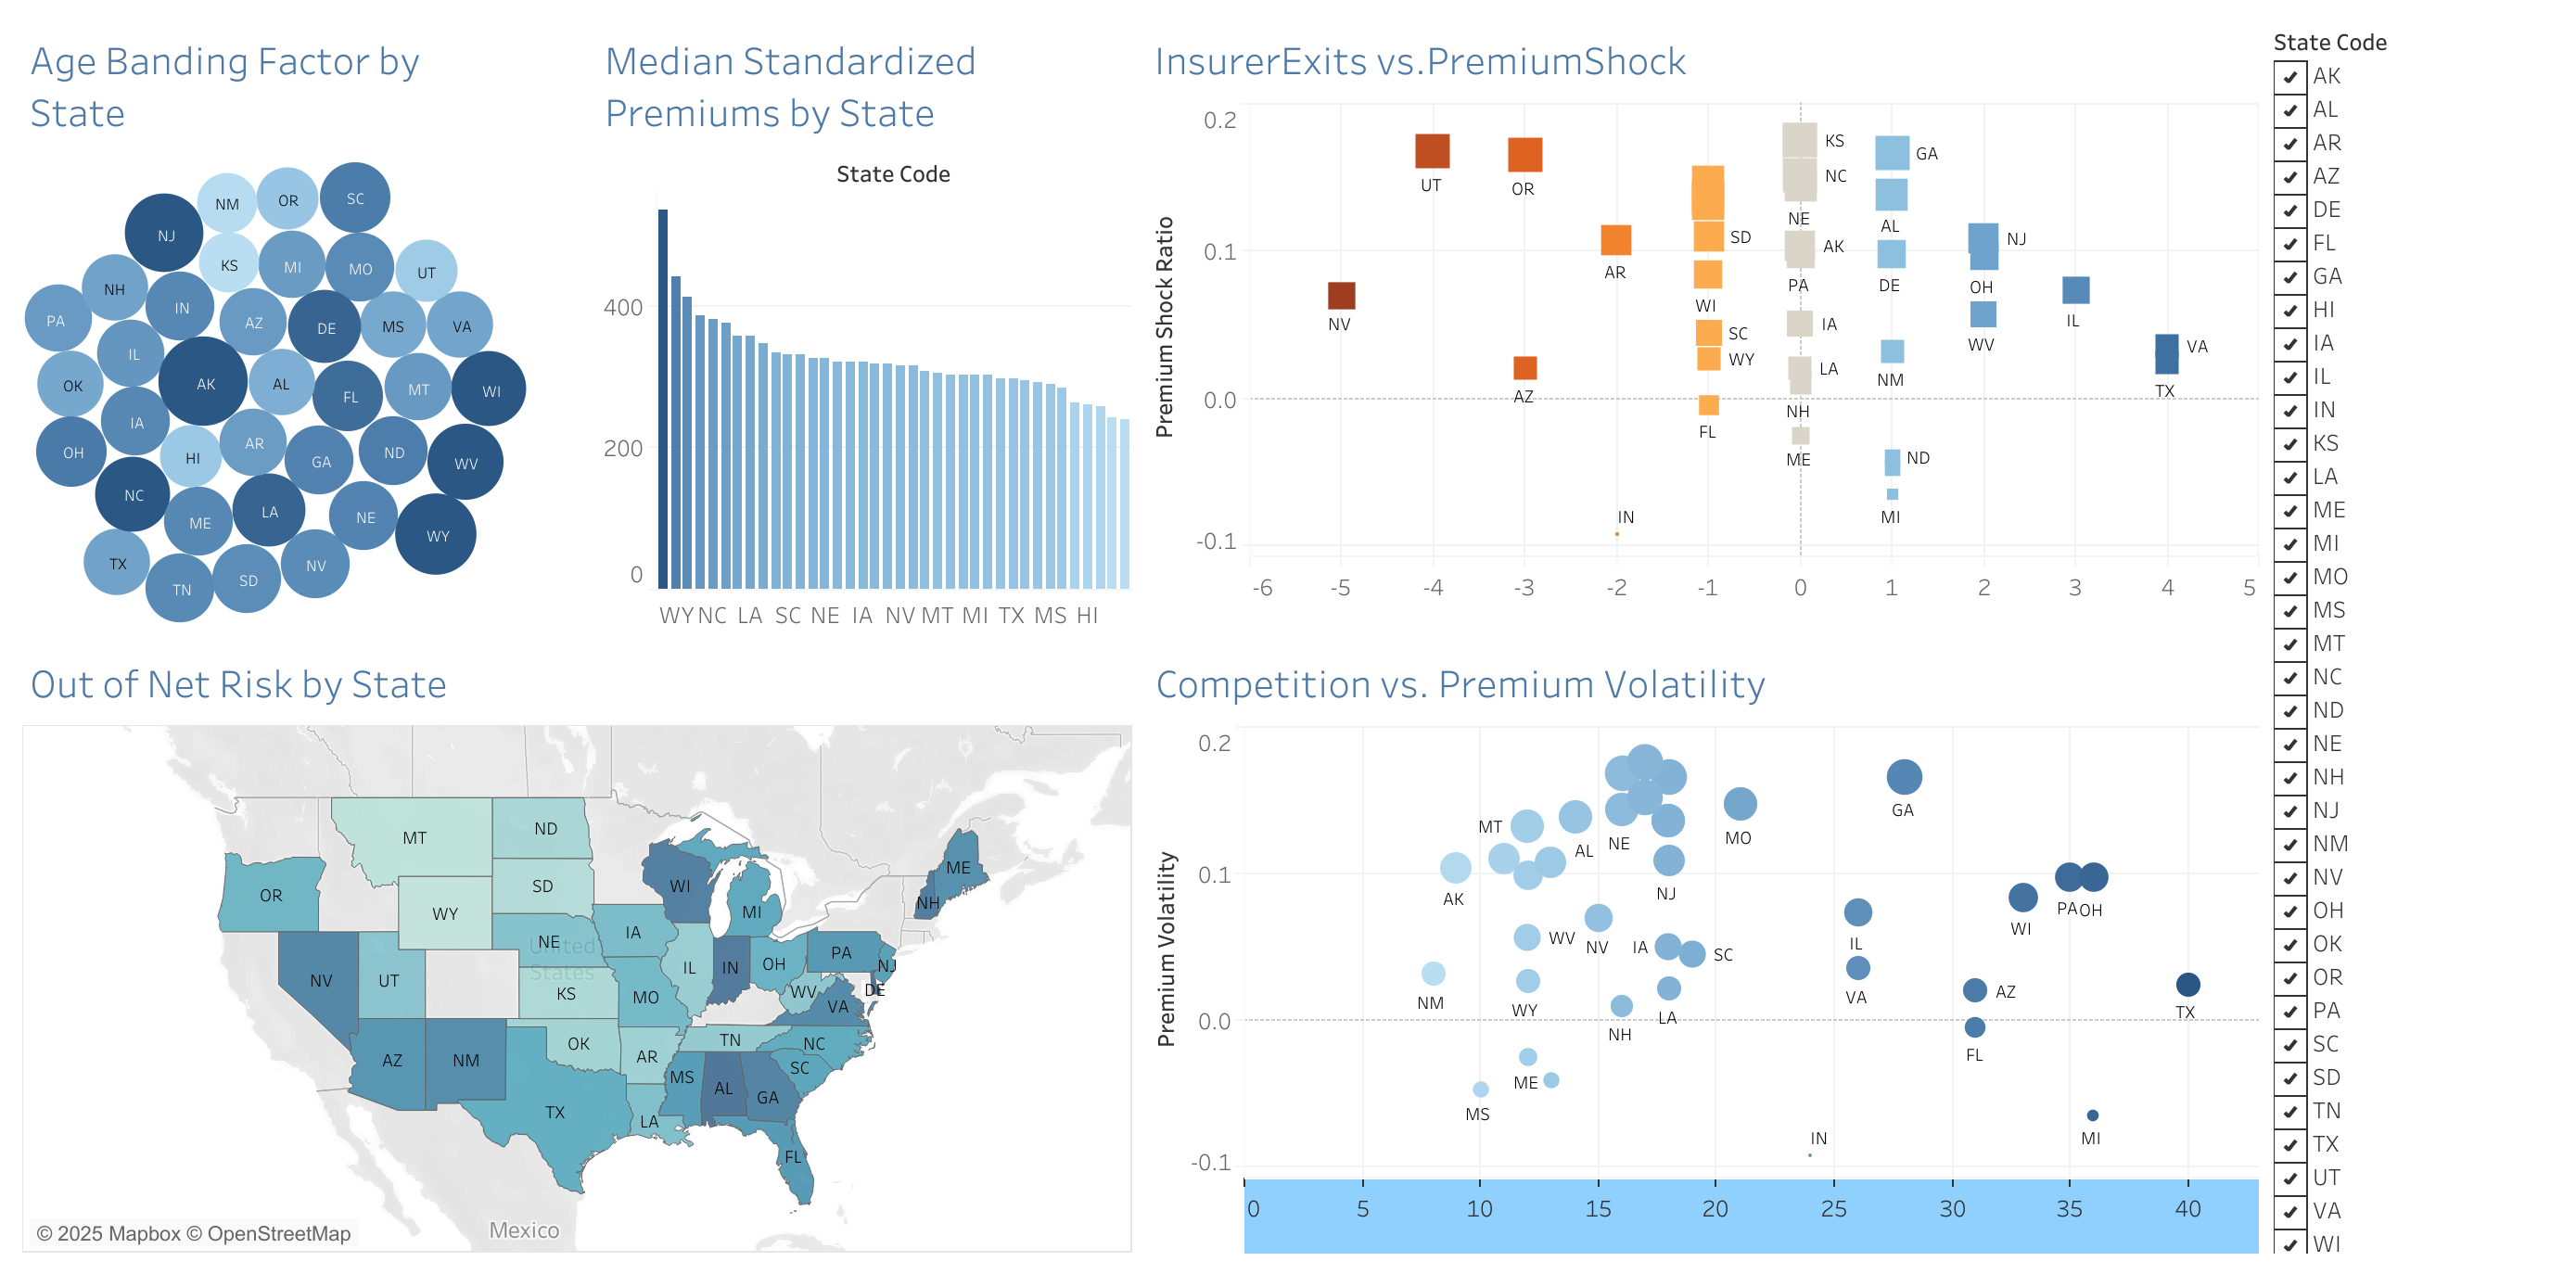

https://public.tableau.com/views/BA775_Team_BigQuery_DashBoard/Dashboard1?:language=zh-CN&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

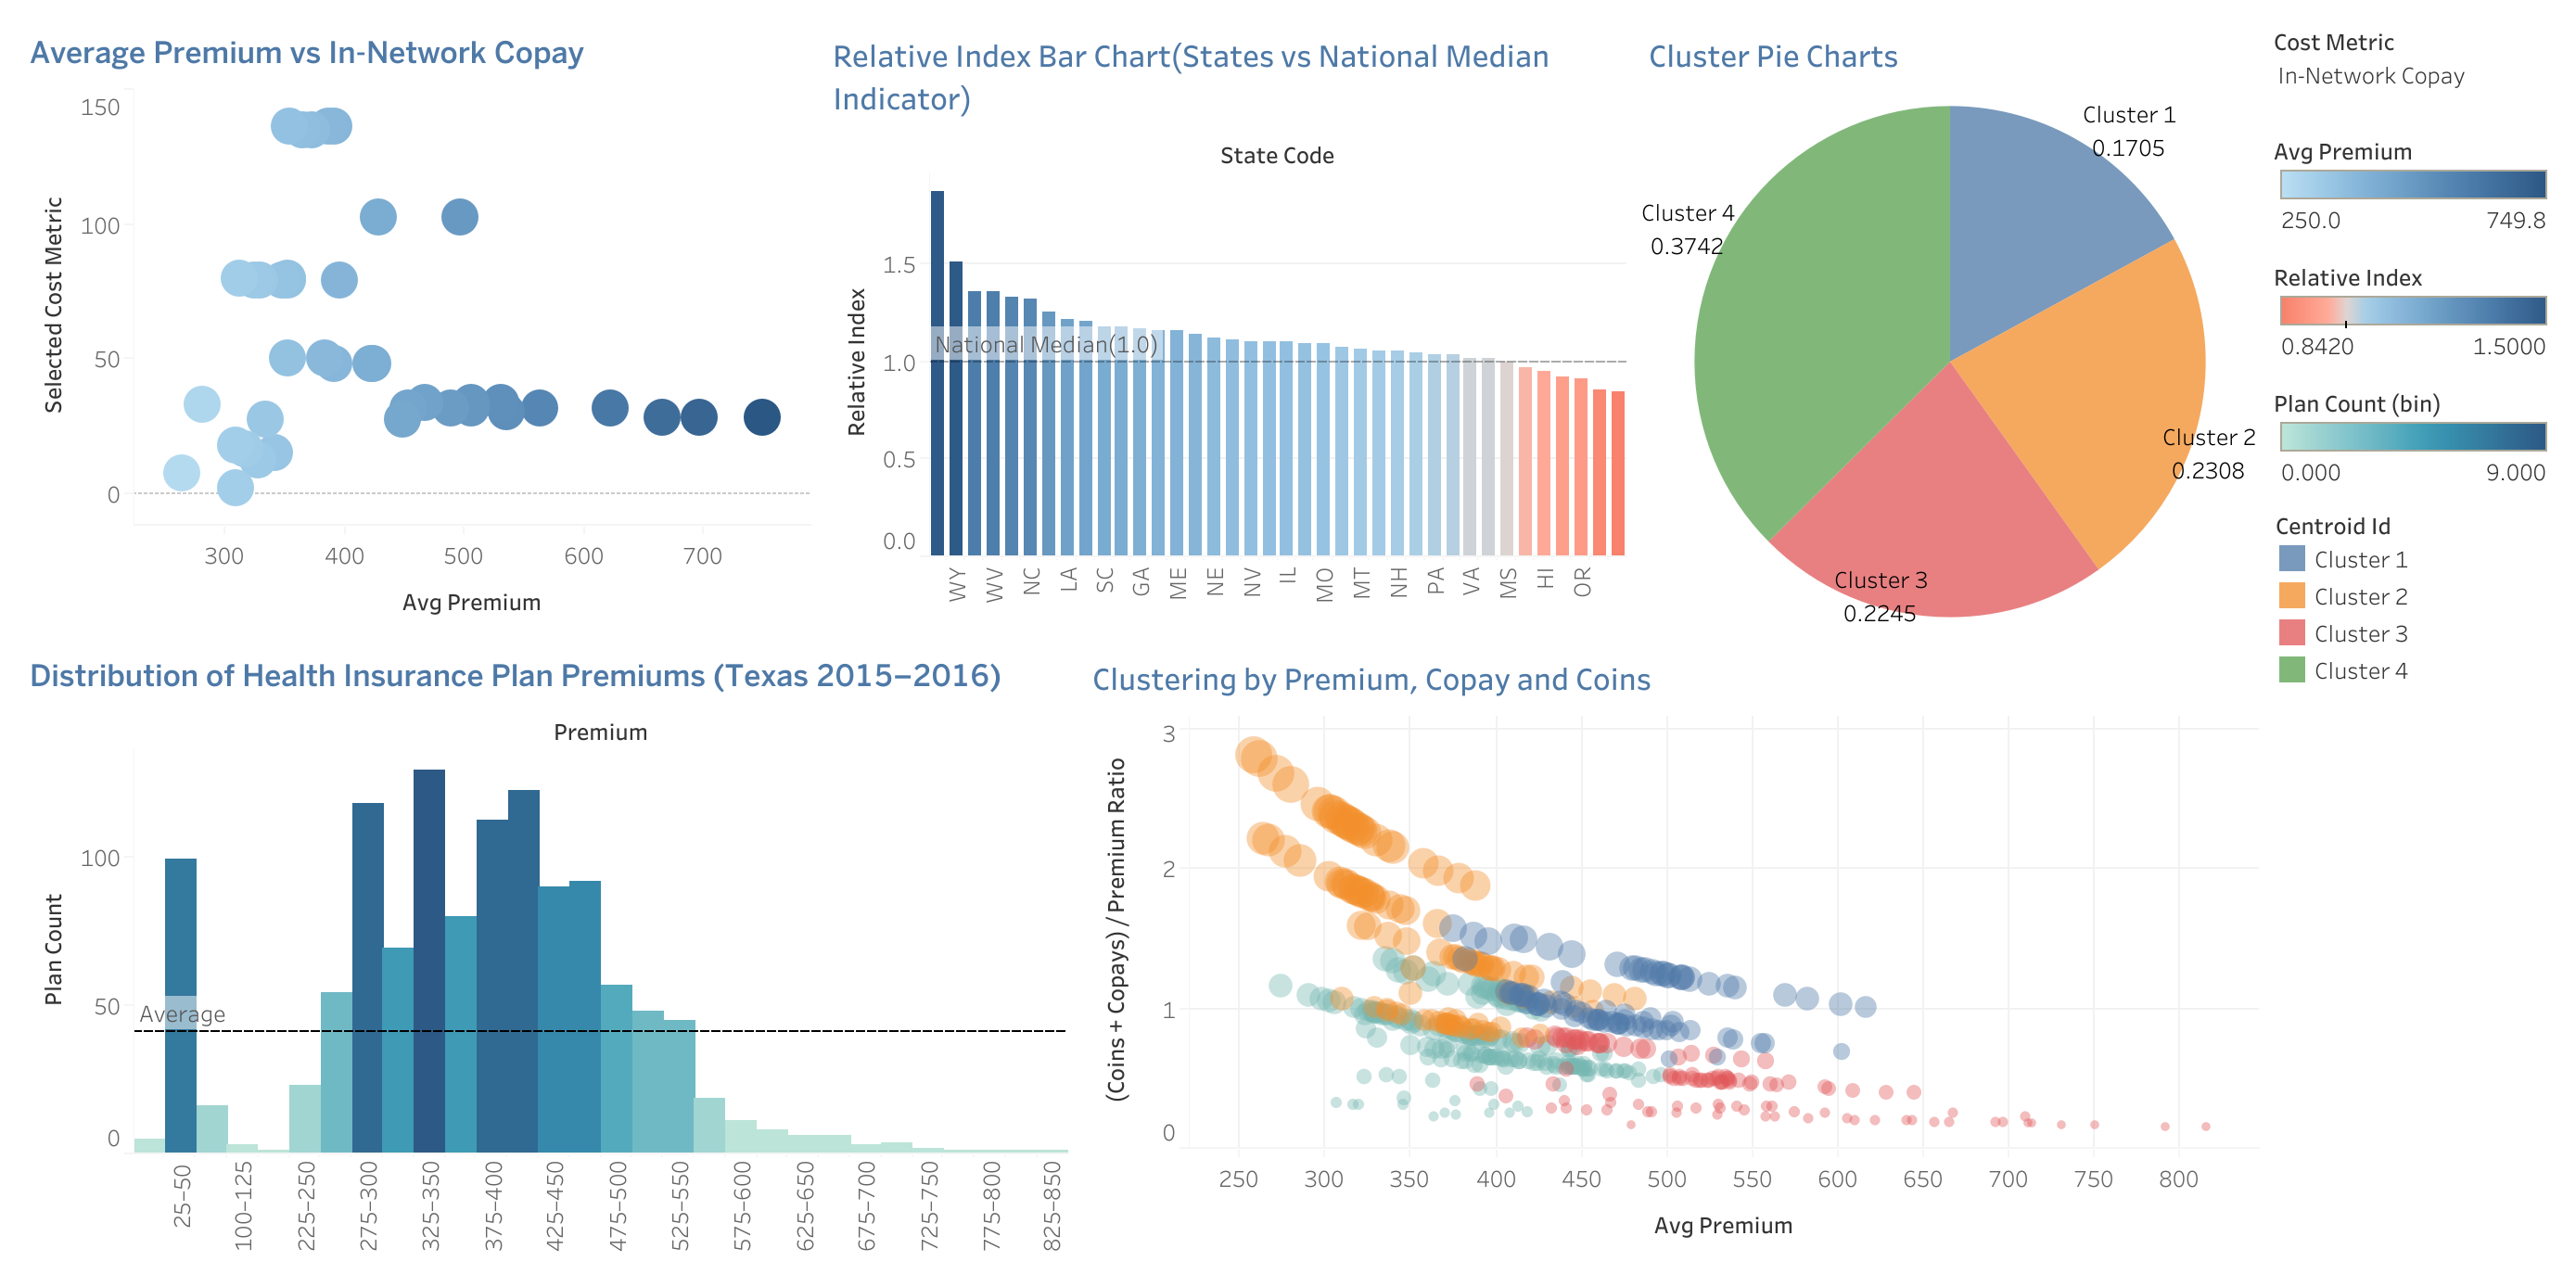

https://public.tableau.com/app/profile/yun.hsuan.ku5753/viz/775teamproject1/Dashboard1?publish=yes


# **Conclusion**

**Overall Conclusion**
- Texas enters the Marketplace as a moderately priced state for standard-age adults (age 34) but exhibits one of the steepest age-rating curves nationally, placing a disproportionate burden on older enrollees.
- The state’s out-of-network financial exposure is mid-range, avoiding the extreme risk seen in states like Delaware or Alabama, but still high enough to present affordability challenges.
- Market structure in Texas is unusually strong: despite having the most issuers nationwide, premiums remained stable, demonstrating that competition in Texas coincides with predictable pricing rather than volatility.
- Insurer exits nationwide do not explain premium shocks; Texas is a clear counterexample, where issuer entry aligned with premium declines.
- At the plan level, premium ≠ benefit richness. Cost-sharing varies widely even within similar premium bands, meaning consumers face inconsistent value-for-money.
- Tobacco pricing in Texas shows a nonstandard pattern: small premium surcharges paired with lower copay and coinsurance—suggesting cross-subsidization between premium and out-of-pocket design.

- K-means clustering further confirms product heterogeneity: Texas plans split into four clear “premium–cost-sharing” archetypes, and two of the largest clusters have nearly identical average premiums (~$393–$394) but sharply different copay/coinsurance burdens—reinforcing that consumers cannot infer protection level from premium alone.
- Tobacco affordability burden is age-concentrated: the tobacco premium surcharge rises steeply with age and becomes most financially significant for mid-to-older adults (roughly ages 40–60), often exceeding $100/month in our age-specific estimates—indicating a systematic affordability penalty even when cost-sharing patterns are not uniformly worse.


**Risk**
- Null and inconsistent data fields (e.g., copay, coinsurance, tobacco indicators) may cause incomplete measurement of benefit generosity or plan-level fairness.
- Premiums were compared without metal-tier adjustment, meaning some observed differences may reflect plan-type mix rather than pure pricing differences.
- The dataset reflects only 2015–2016, a period of significant ACA recalibration; trends may not generalize to later Marketplace dynamics.
- Age 34 standardization, while appropriate and CMS-aligned, does not capture affordability challenges among families or low-income young adults (e.g., 21–27 age bracket).
- OON financial risk is measured using coinsurance ratios, but OON allowed amounts and balance billing exposure are unobserved, meaning true risk may be higher.
- The analysis assumes issuers operate uniformly within a state, but sub-state market variability (rating areas) is not captured here.


**Next Steps**
- Adjust for metal-tier mix (Bronze, Silver, Gold) to isolate whether pricing differences come from actuarial value or market structure.
- Incorporate household income (MHI or FPL thresholds) to evaluate affordability using standardized benchmarks like % of income or ACA Silver benchmark affordability tests.
- Extend analysis to include subsidy impacts (APTC/CSR), which significantly change affordability for low- and middle-income households.
- Compare premiums and cost-sharing using risk-adjusted measures, controlling for issuer-level case-mix and geographic rating areas.
- Expand fairness analysis by quantifying benefit richness indices (e.g., copay composites, coinsurance weights) to detect structural underinsurance.
- Integrate premium trend models (panel regression or fixed effects) to identify structural drivers of volatility beyond issuer entry/exit.
- incorporate deductible/MOOP (if available) and metal level to validate whether clusters align with actuarial generosity.
- test stability across years (2015 vs 2016) or issuer segments to see if archetypes persist.

# How AI was used

- Writing Support & Clarification

- We used ChatGPT to help refine the wording of our insights, conclusion, and section-level summaries for clarity, brevity, and academic tone.

- We also asked AI to help rephrase explanations of cleaning steps and to summarize intermediate results.

- Code Explanation (not code generation)

- In several cases, we used ChatGPT to explain SQL functions (e.g., APPROX_QUANTILES, UNNEST, CROSS JOIN) or to clarify general concepts (e.g., age rating, marketplace competition).

- All code used in the project—including data cleaning, transformations, joins, and computations—was written, executed, and debugged by us.
- AI did not produce or rewrite final SQL queries.



#Reference:

- https://www.cms.gov/marketplace/resources/data/public-use-files

- https://www.healthcare.gov/glossary/co-payment/

- https://www.ecfr.gov/current/title-45/subtitle-A/subchapter-B/part-147/section-147.102

- https://docs.cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-centroids

- https://docs.cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-predict



